We start with the prerequisites for the lab. It's always good to put this in at the beginning. 

In [1]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.sparse import spdiags,linalg,eye
from tqdm import tqdm
import imageio

In [2]:
%pip install torchmetrics

Note: you may need to restart the kernel to use updated packages.


## Project Part 1 : Ising model

No numerical physics class would be complete without doing the Ising model. Howevr, because we want to be starte of the art on this. We are going to do the Ising model in way that is a little bit different than what you have done in the past. We are going to do the Ising model with Deep learning. The first part of this project will largely follow work done in this nature paper

https://arxiv.org/abs/1605.01735 

This captures much of the core ideas that we want in building simulators, and, of course highlights the basic scheme that we get in an Ising model. 

Our first step is to setup the Ising model

### Step 1: Ising Model
The Ising model is a mathematical model used to describe the behavior of a collection of interacting magnetic moments, such as atoms in a solid or spins in a lattice. The model is named after Ernst Ising, a physicist who first proposed it in 1925.

In the Ising model, each magnetic moment is represented by a spin variable, which can take on the values of +1 or -1. The model assumes that these spins interact only with their nearest neighbors in a lattice, and that the interaction between them is influenced by an external magnetic field.

The Hamiltonian of the Ising model describes the energy of the system, and is given by:

$$
H = -J \sum_{i,j} s_{i} s_{j} - \mu_{b} \sum_{j} B_{j} s_{j}
$$

where J is the exchange interaction strength between neighboring spins, $\mu$ is the magnetic moment of each spin, $B_{j}$ is the external magnetic field, and the first sum is taken over all pairs of nearest-neighbor spins in the lattice.

The Ising model exhibits a phase transition, which is a sudden change in the behavior of the system as a parameter is varied. In the absence of an external magnetic field (B=0), the model exhibits a phase transition at a critical temperature known as the Curie temperature (Tc). Below the critical temperature, the system exhibits long-range order, with all spins aligning in the same direction, resulting in a net magnetization. Above the critical temperature, the system becomes disordered, with spins pointing in random directions, and the net magnetization vanishes.

The critical behavior of the Ising model at the phase transition is described by universal scaling laws, which are independent of the microscopic details of the system. These scaling laws have been used to study a wide range of physical systems, including magnets, fluids, and even social networks.

As a first step write (split the below code into multiple steps to build the concept and guide the the student)

As an example of how we will setup the Ising model, see the initialize code.  

In [48]:
np.random.seed(20)

def initialize(N):   
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

N=4
test=initialize(N)
print(test)


[[ 1 -1  1  1]
 [-1 -1  1 -1]
 [ 1 -1  1 -1]
 [-1 -1 -1  1]]


Ok, so now that we have done that let's define a Hamiltonian that will output the energy of the above grid. For this grid, we will use wrap-around (video-game) coordinates whereby the coordinate for $j+1 \forall j \geq N j+1\rightarrow j \mod N$ or in other words the in a 4x4 model the spin at x=0 y=2 can contribute to the x=3 y=2 neighbor spin the x-axis.

In [8]:
#QUESTION
def hamiltonian(iArr,N):
    return energy

hamiltonian(test,N)
#print energy should be 4

NameError: ignored

In [49]:
#ANSWER
def hamiltonian(iArr,N):
    #Not optimized
    energy = 0
    for i in range(N):
        for j in range(N):
            spin   = iArr[i,j]
            energy += -0.5*spin*(iArr[i,(j+1)%N] +  iArr[i,(j-1)%N] +  iArr[(i-1)%N,j] + iArr[(i+1)%N,j])
    return energy

hamiltonian(test,N)
#print energy should be 4

4.0

The above energy with the random seed should give us a value of 4. 

The above energy with the random seed should give us a value of 4. 

Now we would like to come up with a strategy to evolve the spin configurations of the Ising model. To do this we are going to follow a Markov Chain Monte-Carlo Proposal strategy.  For this write a Metropolis algorithm that 

 * Flips the spin of the i,j-th element of the grid
 * Computes $\Delta H=E_{\rm after}-E_{\rm before}$ the change in energy for that element
 * Updates the spin flip with probability $p < e^{-\frac{\Delta H}{k_{b} T} }$ 

Note that we often define temperature in the Ising model using a variable $\beta=\frac{1}{k_{b}T}$. The update need not be temperature.  Additionally, to make our units extra simple we will set the Boltzman Constant $k_{b}=1$. 

In [ ]:
def flip(i,j,iArr,Beta):
    return

print("Before Flip:\n",test)
flip(2,1,test,1)
print("After Flip:\n",test)
#the 2,1 element should go from -1 to 1

In [50]:
def flip(i,j,iArr,TM1): #TM1 = Beta
    spin   = iArr[i,j]
    energy = 2*spin*(iArr[i,(j+1)%N] +  iArr[i,(j-1)%N] +  iArr[(i-1)%N,j] + iArr[(i+1)%N,j])
    scanrnd = np.random.uniform(size=(energy.shape))
    expval  = np.exp(-1*(energy>0)*energy*TM1)
    iArr[i,j]  *= np.where(scanrnd < expval, -1, 1)
    return

print("Before Flip:\n",test)
flip(2,1,test,1)
print("After Flip:\n",test)

Before Flip:
 [[ 1 -1  1  1]
 [-1 -1  1 -1]
 [ 1 -1  1 -1]
 [-1 -1 -1  1]]
After Flip:
 [[ 1 -1  1  1]
 [-1 -1  1 -1]
 [ 1  1  1 -1]
 [-1 -1 -1  1]]


Now define the magnetization of the system. This is just the sum over *all* the spins in the array: 

$$
M=\sum_{i\in {\rm Lattice}} \sigma_{i}
$$

In [9]:
def mag(iArr):
    return 
print("magnetization:",mag(test))#Should be zero if you flipped 2,1 correctly, otherwise from raw is -2

magnetization: None


In [51]:
def mag(iArr):
    return np.sum(iArr)
print("magnetization:",mag(test)) #Should be zero if you flipped 2,1 correctly, otherwise from raw is -2

magnetization: 0


Finally, write a function that tries to flip every element in the array in random order.  Use the functions above to help you. 

In [ ]:
def update_rand(iArr,N,TM1):
    return 

In [52]:
def update_rand(iArr,N,TM1):
    ir = np.random.random_integers(N*N,size=(N*N))-1
    flip(ir//N,ir%N,iArr,TM1)
    return 

print("Before Flip:\n",test)
update_rand(test,4,1)
print("After Flip:\n",test)

Before Flip:
 [[ 1 -1  1  1]
 [-1 -1  1 -1]
 [ 1  1  1 -1]
 [-1 -1 -1  1]]
After Flip:
 [[-1 -1 -1  1]
 [-1  1 -1  1]
 [ 1 -1 -1  1]
 [-1 -1  1 -1]]


/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_67450/2558316572.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 16 + 1) instead
  ir = np.random.random_integers(N*N,size=(N*N))-1


Finally, we can put it all together by adding a plotting function that can allow us to make a viedeo of the phase transition. 

In [17]:
def initialize(N):   
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

def hamiltonian(iArr,N):
    #Not optimized
    energy = 0
    for i in range(N):
        for j in range(N):
            spin   = iArr[i,j]
            energy += -0.5*spin*(iArr[i,(j+1)%N] +  iArr[i,(j-1)%N] +  iArr[(i-1)%N,j] + iArr[(i+1)%N,j])
    return energy

def flip(i,j,iArr,TM1):
    spin   = iArr[i,j]
    energy = 2*spin*(iArr[i,(j+1)%N] +  iArr[i,(j-1)%N] +  iArr[(i-1)%N,j] + iArr[(i+1)%N,j])
    scanrnd = np.random.uniform(size=(energy.shape))
    expval  = np.exp(-1*(energy>0)*energy*TM1)
    iArr[i,j]  *= np.where(scanrnd < expval, -1, 1)
    #if energy < 0:
    #    iArr[i,j] *= -1
    #elif rand() < np.exp(-1*energy*TM1):
    #    iArr[i,j] *= -1
    return

def update_sys(iArr,N,TM1):
    for i in range(N):
        for j in range(N):
            flip(i,j,iArr,TM1)
    return 

def update_rand(iArr,N,TM1):
    #ix = np.random.random_integers(N,size=(N))-1
    #iy = np.random.random_integers(N,size=(N))-1
    #ix = np.random.randint(N,size=(N))
    #iy = np.random.randint(N,size=(N))
    #for i in ix:
    #    for j in iy:
    #        flip(i,j,iArr,TM1)
    ir = np.random.random_integers(N*N,size=(N*N))-1
    for ind in ir:
        i = ind//N
        j = ind % N
        flip(i,j,iArr,TM1)
    return 

def update_rand_par(iArr,N,TM1):
    ir = np.random.random_integers(N*N,size=(N*N))-1
    #print(ir//N)
    #print(ir%N)
    #print(iArr[ir//N,ir%N])
    flip(ir//N,ir%N,iArr,TM1)
    return 

def mag(iArr):
    return np.sum(iArr)
    
def evolve(iArr,N):
    #Not optimized
    energy = 0
    for i in range(N):
        for j in range(N):
            spin   = iArr[i,j]
            energy += 2*spin*(iArr[i,(j+1)%N] +  iArr[i,(j-1)%N] +  iArr[(i-1)%N,j] + iArr[(i+1)%N,j])
    return energy
    
def mapPlot(ax,fig, iArr, i, N, images):
    plt.cla()
    X, Y = np.meshgrid(range(N), range(N))
    #plt.setp(sp.get_yticklabels(), visible=False)
    #plt.setp(sp.get_xticklabels(), visible=False)      
    ax.pcolormesh(X, Y, iArr, cmap=plt.cm.RdBu);
    ax.text(0.6, 0.3,'Time=%d'%i,fontdict={'size': 24, 'color':  'red'})#; plt.axis('tight')    
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image  = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)

Ok with everything now under way, what we want to do is compute the Ising model for a lattice where we vary the temperature over a variety of temps and a variety. We can pick a 10x10 lattice to start with. Additionally, we need to run a large enough amount of steps to ensure equilibration and performe the calulation. Let's go ahead and run one ising model to start with using the functions above. 

Note: that we can make this run much faster with better code, but it doesn't matter to much here. 

/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_67450/2558316572.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 1024 + 1) instead
  ir = np.random.random_integers(N*N,size=(N*N))-1


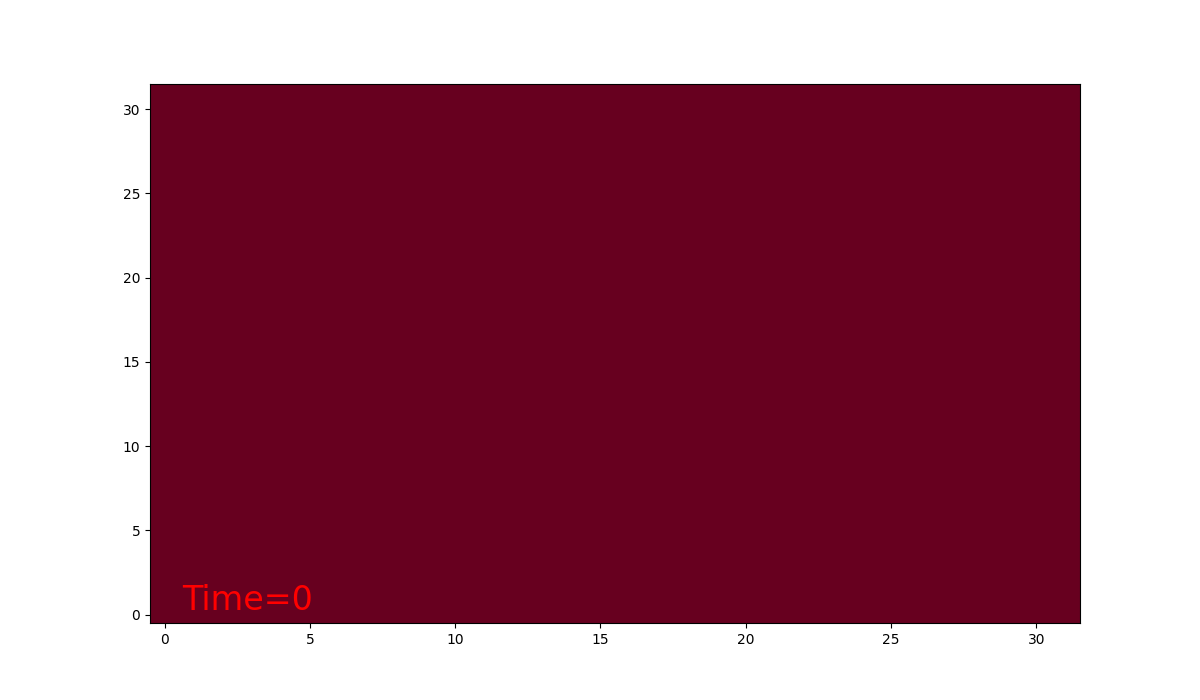

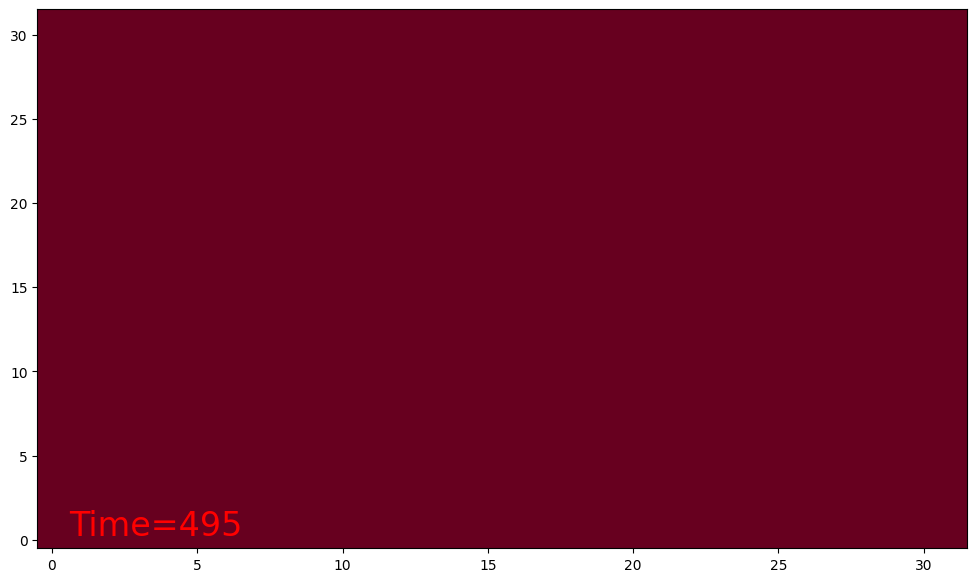

In [53]:
from IPython.display import Image

def mapPlot(ax,fig, iArr, i, N, images):
    plt.cla()
    X, Y = np.meshgrid(range(N), range(N))
    #plt.setp(sp.get_yticklabels(), visible=False)
    #plt.setp(sp.get_xticklabels(), visible=False)      
    ax.pcolormesh(X, Y, iArr, cmap=plt.cm.RdBu);
    ax.text(0.6, 0.3,'Time=%d'%i,fontdict={'size': 24, 'color':  'red'})#; plt.axis('tight')    
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image  = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)

def runTemp(iT,iN,images,fig,ax,eqSteps=500,mcSteps=500):
    pArr = initialize(iN)         # initialise
    E1 = M1 = E2 = M2 = 0
    beta=1.0/iT 
    beta2=beta**2
    for i in range(eqSteps):         # equilibrate
        update_rand(pArr, iN, beta)   
    
    for i in range(mcSteps):
        update_rand(pArr, iN, beta)           
        Ene = hamiltonian(pArr, iN)     # calculate the energy
        Mag = mag(pArr)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene
        if i % 5 == 0: 
            mapPlot(ax,fig,pArr,i,iN,images)
images=[]
fig, ax = plt.subplots(figsize=(12,7))
runTemp(1.00,32,images,fig,ax)
imageio.mimsave('./test.gif', images, fps=10)
Image(open('test.gif','rb').read())

Play around with the tempature. How does the Ising model look for different tempatures? 

Now, what we would like to do for each of our simulations is compute a bunch of quantities about the matter. In particular, we would like to compute the following quantities for the Ising model: 

 * Average Energy $\langle E \rangle$ averaged over all the cells of the Ising model
 * Average Magnetization $\langle M \rangle$ averaged over all the cells of the Ising model
 * Specific Heat $C=\frac{\langle E^{2}\rangle - \langle E\rangle^{2}}{T^{2}}$ where $E$ is the cell energy averaged over all the cells of the Ising model
 * Magnetic Susceptibility $\chi=\frac{\langle M^{2}\rangle - \langle M\rangle^{2}}{T}$ where $M$ is the magnetization averaged over all of the cells in the Ising model

Now the importance of this is that we would like to scan the temperature and observe a phase transition. The specific heat,  in particular, has an infinite discontinuity in the precence of a phase trasition. 

In the below modify the function to output thse variable. 

In [ ]:
def runTemp(iT,iN,images,fig,ax,eqSteps=500,mcSteps=500):
    pArr = initialize(iN)         # initialise
    E1 = M1 = E2 = M2 = 0
    beta=1.0/iT 
    for i in range(eqSteps):         # equilibrate
        update_rand(pArr, iN, beta)   
    
    for i in range(mcSteps):
        update_rand(pArr, iN, beta)           
        Ene = hamiltonian(pArr, iN)     # calculate the energy
        Mag = mag(pArr)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene
        if i % 5 == 0: 
            mapPlot(ax,fig,pArr,i,iN,images)

    #compute the values for E,M,C,X here
    E = 
    M = 
    C = 
    X = 
    return E,M,C,X

In [9]:
def runTemp(iT,iN,images,fig,ax,eqSteps=500,mcSteps=500):
    pArr = initialize(iN)         # init
    E1 = M1 = E2 = M2 = 0
    beta=1.0/iT 
    for i in range(eqSteps):         # equilibrate
        update_rand(pArr, iN, beta)   
    
    for i in range(mcSteps):
        update_rand(pArr, iN, beta)           
        Ene = hamiltonian(pArr, iN)     # calculate the energy
        Mag = mag(pArr)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene
        #if i % 5 == 0: 
        #    mapPlot(ax,fig,pArr,i,iN,images)

    navg=1./(iN**2)
    E = (E1/mcSteps)*navg
    M = (M1/mcSteps)*navg
    C = (E2/mcSteps - (E1/mcSteps)*(E1/mcSteps))*navg*(beta**2)
    X = (M2/mcSteps - (M1/mcSteps)*(M1/mcSteps))*navg*beta
    return E,M,C,X

Now we have computed all of these things, lets go ahead and scan the temperature to see what is going on. Make a scan of temperature from $k_{b}T = 1.5$ to $3.3$. 

As you scan along plot the different values for E,M,C,$\chi$ Where do you see the phase transition? What characterizes this phase transition? 

In [10]:
N=10
nt = 32
T       = np.linspace(1.53, 3.28, nt); 
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
#images=[]
#fig, ax = plt.subplots(figsize=(12,7))
for temp in tqdm (range (nt), desc="Loading..."):
    #id,temp in enumerate(T):
    #print(id,temp)
    E[temp],M[temp],C[temp],X[temp] = runTemp(T[temp],N,images,fig,ax,eqSteps=500,mcSteps=500)


Loading...:   0%|                                                                                                                                                                                                                      | 0/32 [00:00<?, ?it/s]/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_67450/2558316572.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  ir = np.random.random_integers(N*N,size=(N*N))-1
Loading...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:07<00:00,  4.32it/s]


Now, give our above simulation. Go ahead and plot the the various parameters. What do you see? 

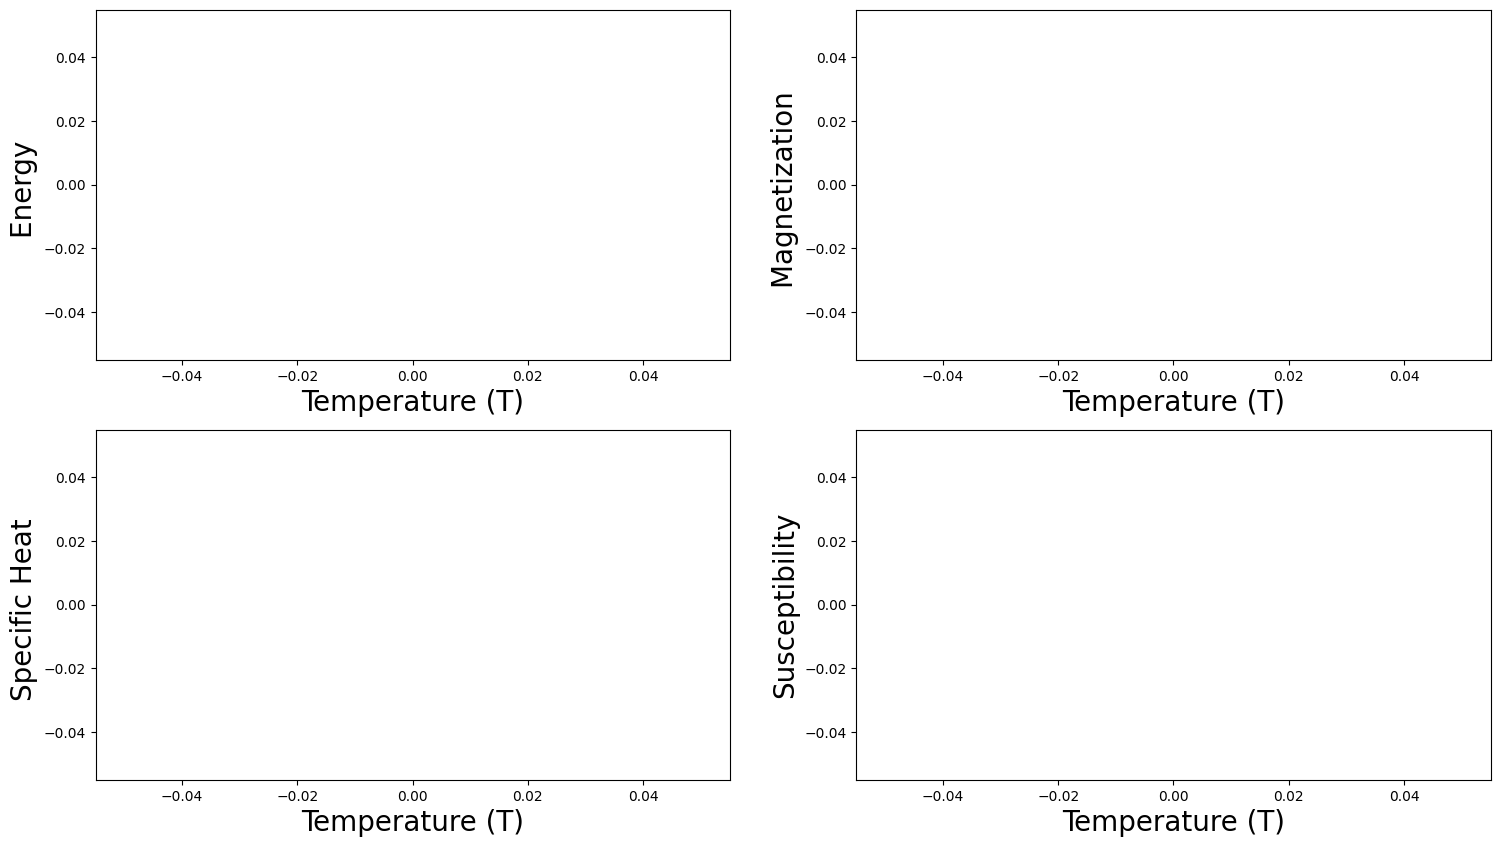

In [54]:
f = plt.figure(figsize=(18, 10)); #  

sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');


sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');


sp =  f.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   


sp =  f.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');



From the above, it should be clear there is a critical temperature for the Ising model. Its in weird units, but we could easily conver this to a normal temperature. The other thing you can see wright away is how this material magnetizes and how it can change as a function of the different temperature regimes. 

The full 2D Ising model has also been solved analytically, with a complete solution coming in the past 10 years. This was the motivation for the Fields medal in 2022 for Hugo Duminil-Copin at the University of Geneva. That being said the properties of criticallity and a simplfied solution have been known since 1950. 

Can you validate that you get the right critical tempature from analytic calcualtions? 

Note for grader $T_{c} = 2/\log(1+\sqrt{2})$




## Step 2:  Constructing Ising Model Simulation

Now that we have generated an Ising model, we want to build an optimized scheme to run the Ising model many times so that we can train a neural network to understand the critical temperatuer of the ising model. 

For this part of the lab, we would like to generate Ising Monte Carlo Simulations where we randomly sample many configurations, and we the evolve the configuration at a specific temperature and then save it. Practically means we need to make simulated events where in each event, we 

 * Randomly sample a config
 * Evolve that config $N$ steps ($N\approx500$)
 * Save the evolved configuration, magnetization and temperature
 * Repeat the above nsim times and write this all to disk

Once, we have done that then we can use the datasets have generated to make a neural network that takes as input the random configuration and outputs the temperature. 

So now lets make a class that generates Ising configurations. We can use use the previous functions. The important function in our class is the simulate_save, this will write a file with all of our Ising simulations. 

A class setup is below for you to fill out.

In [55]:
import h5py 

class Ising():
    
    def __init__(self, iN, Temp):
        self.N   = iN
        self.T   = Temp
        self.arr = self.initialize()
        self.steps = 300
        self.E   = np.array([])
        self.M   = np.array([])
        self.C   = np.array([])
        self.X   = np.array([])
        self.nsim = 1000
        
    def initialize(self):   
        #use previous function
        return state
    
    def simulate(self):
        beta = 1./self.T
        for i in range(self.steps):
            update_rand(self.arr, self.N, beta)           
            Ene = hamiltonian(self.arr, N)
            Mag = mag(self.arr)
            #Now save energy magnetization 
            self.E   = np.append(self.E,Ene)
            self.M   = np.append(self.M,Mag)
            #Now save the RMS of E(Specific hit) of the previous 100 steps
            #Also do that for Magnetic susceptibility
            pC  = np.std(self.E[-100:])
            pX  = np.std(self.M[-100:])
            self.C   = np.append(self.C,pC)
            self.X   = np.append(self.X,pX)

    def simulate_save(self,pre=''):
        h5f  = h5py.File((pre)+'data_'+str(self.T)+'.h5', 'a')
        data = np.array([])#np.empty((1,self.N,self.N), int)
        mags = np.array([])
        TM1  = 1./self.T
        for n in range(self.nsim):
            if n % 25 == 0:
                print("sim",n)
            self.initialize()
            ## Add code to run simulate the ising model nsteps
            ## update self.arr  

            #for each simulation we want to save the magnetization and the array      
            pMag = mag(self.arr)
            data = np.append(self.arr,data)
            mags  = np.append(pMag,mags)
        #now we write the output array into a dataset
        data = np.reshape(data,(self.nsim,self.N,self.N))
        print(data.shape)
        h5f.create_dataset('data', data=data)
        h5f.create_dataset('mag' , data=mags)
        h5f.close()
                    
    def lastAvg(self):
        avgE = np.mean(self.E[500:-1])
        avgM = np.mean(self.M[500:-1])
        avgC = np.std(self.E[500:-1])
        avgX = np.std(self.M[500:-1])
        return avgE,avgM,avgC,avgX
        
    def plotEvol(self):
        ts = range(len(self.E))
        f = plt.figure(figsize=(18, 10)); #  
        sp =  f.add_subplot(2, 2, 1 );
        plt.scatter(ts, self.E, s=50, marker='o', color='IndianRed')
        plt.xlabel("step", fontsize=20);
        plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

        sp =  f.add_subplot(2, 2, 2 );
        plt.scatter(ts, abs(self.M), s=50, marker='o', color='RoyalBlue')
        plt.xlabel("step", fontsize=20); 
        plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

        sp =  f.add_subplot(2, 2, 3 );
        plt.scatter(ts, self.C, s=50, marker='o', color='IndianRed')
        plt.xlabel("ts", fontsize=20);  
        plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

        sp =  f.add_subplot(2, 2, 4 );
        plt.scatter(ts, self.X, s=50, marker='o', color='RoyalBlue')
        plt.xlabel("ts", fontsize=20); 
        plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');
        
test = Ising(64,3.4)
test.simulate()
test.plotEvol()

NameError: name 'state' is not defined

/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_67450/2558316572.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 4096 + 1) instead
  ir = np.random.random_integers(N*N,size=(N*N))-1


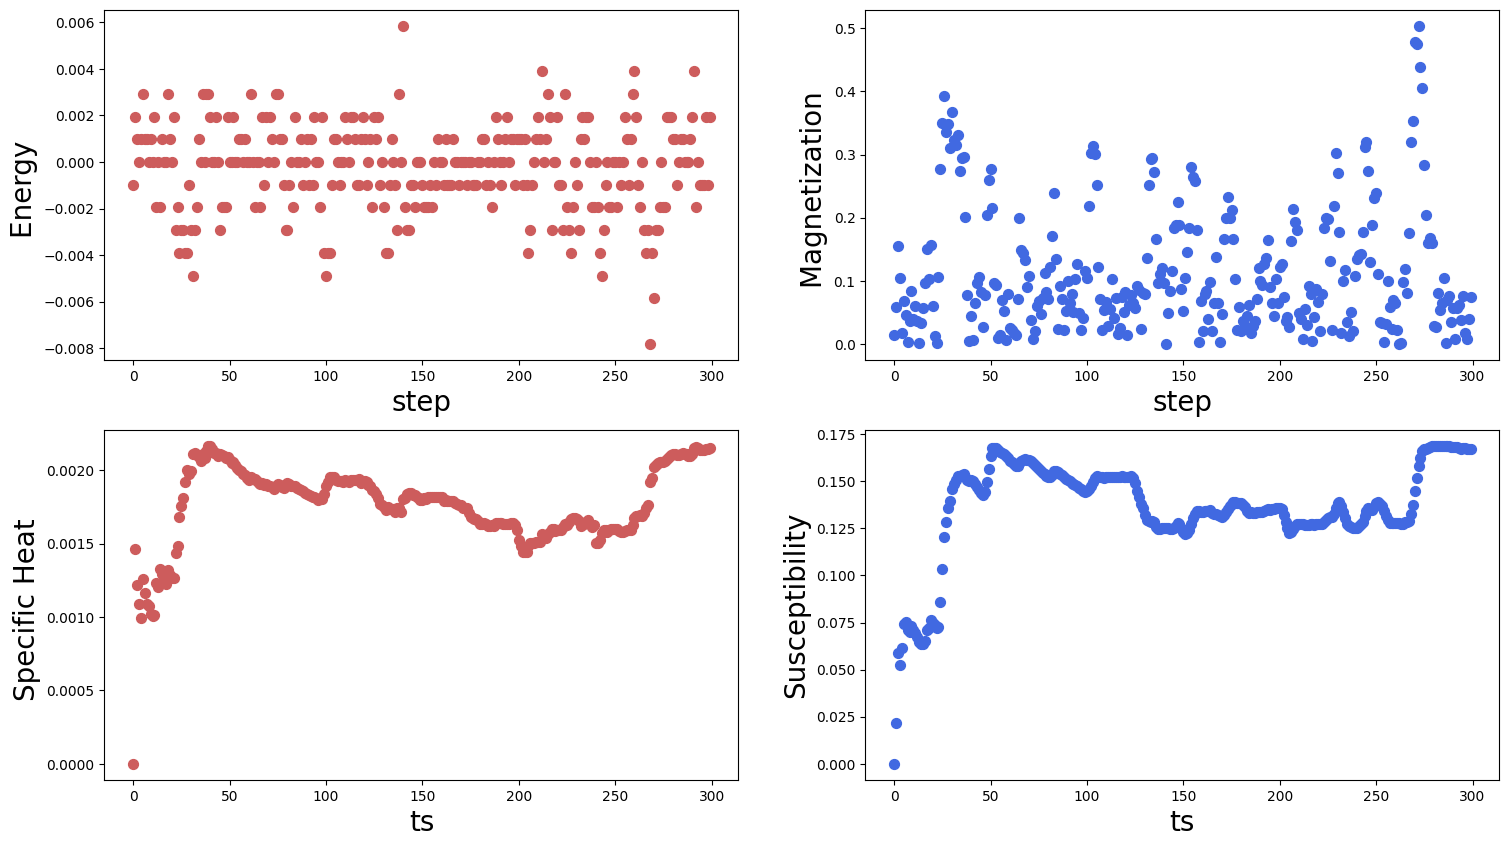

In [56]:
import h5py 

class Ising():
    
    def __init__(self, iN, Temp):
        self.N   = iN
        self.T   = Temp
        self.arr = self.initialize()
        self.steps = 300
        self.E   = np.array([])
        self.M   = np.array([])
        self.C   = np.array([])
        self.X   = np.array([])
        self.nsim = 1000
        
    def initialize(self):   
        state = 2*np.random.randint(2, size=(self.N,self.N))-1
        return state
    
    def simulate(self):
        self.images=[]
        N2M1 = 1./self.N/self.N
        TM1  = 1./self.T
        for i in range(self.steps):
            update_rand(self.arr, self.N, TM1)           
            Ene = hamiltonian(self.arr, N)
            Mag = mag(self.arr)
            self.E   = np.append(self.E,Ene*N2M1)
            self.M   = np.append(self.M,Mag*N2M1)
            pC  = np.std(self.E[-100:])
            pX  = np.std(self.M[-100:])
            self.C   = np.append(self.C,pC)
            self.X   = np.append(self.X,pX)

    def simulate_save(self,pre=''):
        h5f  = h5py.File((pre)+'data_'+str(self.T)+'.h5', 'a') #w is overwrite
        data = np.array([])#np.empty((1,self.N,self.N), int)
        mags = np.array([])
        TM1  = 1./self.T
        #now we are going to run our simulation nsim times and for each simulation
     
        for n in range(self.nsim):
            if n % 25 == 0:
                print("sim",n)
            self.initialize()
            for i in range(self.steps):
                update_rand(self.arr, self.N, TM1)  
            pMag = mag(self.arr)
            data = np.append(self.arr,data)
            mags  = np.append(pMag,mags)
        data = np.reshape(data,(self.nsim,self.N,self.N))
        h5f.create_dataset('data', data=data)
        h5f.create_dataset('mag' , data=mags)
        h5f.close()
            
       
    def lastAvg(self):
        avgE = np.mean(self.E[500:-1])
        avgM = np.mean(self.M[500:-1])
        avgC = np.std(self.E[500:-1])
        avgX = np.std(self.M[500:-1])
        return avgE,avgM,avgC,avgX
        
    def plotEvol(self):
        ts = range(len(self.E))
        f = plt.figure(figsize=(18, 10)); #  
        sp =  f.add_subplot(2, 2, 1 );
        plt.scatter(ts, self.E, s=50, marker='o', color='IndianRed')
        plt.xlabel("step", fontsize=20);
        plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

        sp =  f.add_subplot(2, 2, 2 );
        plt.scatter(ts, abs(self.M), s=50, marker='o', color='RoyalBlue')
        plt.xlabel("step", fontsize=20); 
        plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

        sp =  f.add_subplot(2, 2, 3 );
        plt.scatter(ts, self.C, s=50, marker='o', color='IndianRed')
        plt.xlabel("ts", fontsize=20);  
        plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

        sp =  f.add_subplot(2, 2, 4 );
        plt.scatter(ts, self.X, s=50, marker='o', color='RoyalBlue')
        plt.xlabel("ts", fontsize=20); 
        plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');
        
test = Ising(64,3.4)
test.simulate()
test.plotEvol()

Alright now that we have a class to run our Ising model and save things to disk we can go ahead and generate some samples following the code below, lets first generate a test sample so that we understand how to train the neural network. For this, lets just generate 10 test samples for each point, this shouldn't take too long, and will allow us to setup the neural network. 

Also, to make our ising model manageable, lets use a 32x32 Ising model. 

In [57]:
import os
nt=20
T       = np.round(np.linspace(1.53, 3.28, nt),2)
print(T)
for temp in tqdm (range (nt), desc="Loading..."):
    filename='data_'+str(T[temp])+'.h5'
    try:
        os.remove(filename)
    except OSError:
        pass
    test = Ising(32,T[temp])
    test.nsim=500
    test.simulate_save()
    
f = h5py.File('data_1.53.h5', 'r') 
list(f.keys())
f['data'].shape
!ls

[1.53 1.62 1.71 1.81 1.9  1.99 2.08 2.17 2.27 2.36 2.45 2.54 2.64 2.73
 2.82 2.91 3.   3.1  3.19 3.28]


Loading...:   0%|                                                                                                                                                                                                                      | 0/20 [00:00<?, ?it/s]

sim 0


/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_67450/2558316572.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 1024 + 1) instead
  ir = np.random.random_integers(N*N,size=(N*N))-1


sim 25
sim 50
sim 75
sim 100
sim 125
sim 150
sim 175
sim 200
sim 225
sim 250
sim 275
sim 300
sim 325
sim 350
sim 375
sim 400
sim 425
sim 450
sim 475


Loading...:   5%|██████████▎                                                                                                                                                                                                   | 1/20 [00:27<08:40, 27.40s/it]

sim 0
sim 25
sim 50
sim 75
sim 100
sim 125
sim 150
sim 175
sim 200
sim 225
sim 250
sim 275
sim 300
sim 325
sim 350
sim 375
sim 400
sim 425
sim 450
sim 475


Loading...:  10%|████████████████████▌                                                                                                                                                                                         | 2/20 [00:54<08:09, 27.18s/it]

sim 0
sim 25
sim 50
sim 75
sim 100
sim 125
sim 150
sim 175
sim 200
sim 225
sim 250
sim 275
sim 300
sim 325
sim 350
sim 375
sim 400
sim 425
sim 450
sim 475


Loading...:  15%|██████████████████████████████▉                                                                                                                                                                               | 3/20 [01:21<07:43, 27.26s/it]

sim 0
sim 25
sim 50
sim 75
sim 100
sim 125
sim 150
sim 175
sim 200
sim 225
sim 250
sim 275
sim 300
sim 325
sim 350
sim 375
sim 400
sim 425
sim 450
sim 475


Loading...:  20%|█████████████████████████████████████████▏                                                                                                                                                                    | 4/20 [01:48<07:14, 27.15s/it]

sim 0
sim 25
sim 50
sim 75
sim 100
sim 125
sim 150
sim 175
sim 200
sim 225
sim 250
sim 275
sim 300
sim 325
sim 350
sim 375
sim 400
sim 425
sim 450
sim 475


Loading...:  25%|███████████████████████████████████████████████████▌                                                                                                                                                          | 5/20 [02:15<06:44, 26.98s/it]

sim 0
sim 25
sim 50
sim 75
sim 100
sim 125
sim 150
sim 175
sim 200
sim 225
sim 250
sim 275
sim 300
sim 325
sim 350
sim 375
sim 400
sim 425
sim 450
sim 475


Loading...:  30%|█████████████████████████████████████████████████████████████▊                                                                                                                                                | 6/20 [02:42<06:15, 26.84s/it]

sim 0
sim 25
sim 50
sim 75
sim 100
sim 125
sim 150
sim 175
sim 200
sim 225
sim 250
sim 275
sim 300
sim 325
sim 350
sim 375
sim 400
sim 425
sim 450
sim 475


Loading...:  35%|████████████████████████████████████████████████████████████████████████                                                                                                                                      | 7/20 [03:08<05:47, 26.76s/it]

sim 0
sim 25
sim 50
sim 75
sim 100
sim 125
sim 150
sim 175
sim 200
sim 225
sim 250
sim 275
sim 300
sim 325
sim 350
sim 375
sim 400
sim 425
sim 450
sim 475


Loading...:  40%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                                                           | 8/20 [03:35<05:21, 26.83s/it]

sim 0
sim 25
sim 50
sim 75
sim 100
sim 125
sim 150
sim 175
sim 200
sim 225
sim 250
sim 275
sim 300
sim 325
sim 350
sim 375
sim 400
sim 425
sim 450
sim 475


Loading...:  45%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                 | 9/20 [04:02<04:54, 26.82s/it]

sim 0
sim 25
sim 50
sim 75
sim 100
sim 125
sim 150
sim 175
sim 200
sim 225
sim 250
sim 275
sim 300
sim 325
sim 350
sim 375
sim 400
sim 425
sim 450
sim 475


Loading...:  50%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                      | 10/20 [04:29<04:28, 26.82s/it]

sim 0
sim 25
sim 50
sim 75
sim 100
sim 125
sim 150
sim 175
sim 200
sim 225
sim 250
sim 275
sim 300
sim 325
sim 350
sim 375
sim 400
sim 425
sim 450
sim 475


Loading...:  55%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                            | 11/20 [04:56<04:01, 26.84s/it]

sim 0
sim 25
sim 50
sim 75
sim 100
sim 125
sim 150
sim 175
sim 200
sim 225
sim 250
sim 275
sim 300
sim 325
sim 350
sim 375
sim 400
sim 425
sim 450
sim 475


Loading...:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                  | 12/20 [05:23<03:36, 27.01s/it]

sim 0
sim 25
sim 50
sim 75
sim 100
sim 125
sim 150
sim 175
sim 200
sim 225
sim 250
sim 275
sim 300
sim 325
sim 350
sim 375
sim 400
sim 425
sim 450
sim 475


Loading...:  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 13/20 [05:50<03:09, 27.12s/it]

sim 0
sim 25
sim 50
sim 75
sim 100
sim 125
sim 150
sim 175
sim 200
sim 225
sim 250
sim 275
sim 300
sim 325
sim 350
sim 375
sim 400
sim 425
sim 450
sim 475


Loading...:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 14/20 [06:18<02:43, 27.27s/it]

sim 0
sim 25
sim 50
sim 75
sim 100
sim 125
sim 150
sim 175
sim 200
sim 225
sim 250
sim 275
sim 300
sim 325
sim 350
sim 375
sim 400
sim 425
sim 450
sim 475


Loading...:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 15/20 [06:45<02:16, 27.32s/it]

sim 0
sim 25
sim 50
sim 75
sim 100
sim 125
sim 150
sim 175
sim 200
sim 225
sim 250
sim 275
sim 300
sim 325
sim 350
sim 375
sim 400
sim 425
sim 450
sim 475


Loading...:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 16/20 [07:13<01:49, 27.37s/it]

sim 0
sim 25
sim 50
sim 75
sim 100
sim 125
sim 150
sim 175
sim 200
sim 225
sim 250
sim 275
sim 300
sim 325
sim 350
sim 375
sim 400
sim 425
sim 450
sim 475


Loading...:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 17/20 [07:40<01:22, 27.38s/it]

sim 0
sim 25
sim 50
sim 75
sim 100
sim 125
sim 150
sim 175
sim 200
sim 225
sim 250
sim 275
sim 300
sim 325
sim 350
sim 375
sim 400
sim 425
sim 450
sim 475


Loading...:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 18/20 [08:08<00:54, 27.45s/it]

sim 0
sim 25
sim 50
sim 75
sim 100
sim 125
sim 150
sim 175
sim 200
sim 225
sim 250
sim 275
sim 300
sim 325
sim 350
sim 375
sim 400
sim 425
sim 450
sim 475


Loading...:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 19/20 [08:35<00:27, 27.28s/it]

sim 0
sim 25
sim 50
sim 75
sim 100
sim 125
sim 150
sim 175
sim 200
sim 225
sim 250
sim 275
sim 300
sim 325
sim 350
sim 375
sim 400
sim 425
sim 450
sim 475


Loading...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [09:02<00:00, 27.10s/it]

LongExercise_notes.ipynb          data_3.28.h5
Project3Notes.ipynb               test.gif
Project3Notes_2023_04_12_v1.ipynb tridata_1.53.h5
README.md                         tridata_1.73.h5
data_1.53.h5                      tridata_1.92.h5
data_1.62.h5                      tridata_2.12.h5
data_1.71.h5                      tridata_2.32.h5
data_1.81.h5                      tridata_2.52.h5
data_1.9.h5                       tridata_2.71.h5
data_1.99.h5                      tridata_2.91.h5
data_2.08.h5                      tridata_3.11.h5
data_2.17.h5                      tridata_3.31.h5
data_2.27.h5                      tridata_3.5.h5
data_2.36.h5                      tridata_3.7.h5
data_2.45.h5                      tridata_3.9.h5
data_2.54.h5                      tridata_4.1.h5
data_2.64.h5                      tridata_4.29.h5
data_2.73.h5                      tridata_4.49.h5
data_2.82.h5                      tridata_4.69.h5
data_2.91.h5                      tridata_4.89.h5
data_3.0.h5   

Now we would like to develop a neural network that will take in this dataaset and train for whether the sample has undergood a phase transition. 

Before we build the Neural Network, we are going to use Torch Dataset to process and format the data. Setting this up is a little annoying so we will just write the code for this down here, and we will provide a little example of how to read a Torch DataLoaer. 

The one part that we will leave for you to figure out is what are the right labels and how do you split up the testing and training dataset to ensure your network learns. 

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchmetrics import Accuracy
from torch.utils.data import Sampler, BatchSampler, Dataset, DataLoader, Subset, SubsetRandomSampler, random_split

class DataSet(Dataset):
    def __init__(self, samples, labels, temps):
        super(DataSet, self).__init__()
        self.labels  = labels
        self.samples = samples
        self.temps   = temps
        if len(samples) != len(labels):
            raise ValueError(
                f"should have the same number of samples({len(samples)}) as there are labels({len(labels)})")
            
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        y = self.labels[index]
        x = self.samples[index]
        t = self.temps[index]
        return x, y, t

class DataSampler(Sampler):
    def __init__(self, dataset, batch_size):
        self.batch_size     = batch_size
        self.dataset_length = len(dataset)
        self.n_batches      = self.dataset_length / self.batch_size
        self.batch_ids      = torch.randperm(int(self.n_batches))

    def __len__(self):
        return self.batch_size

    def __iter__(self):
        for id in self.batch_ids:
            idx1 = torch.arange(id * self.batch_size, (id + 1) * self.batch_size)
            for index in idx1:
                yield int(index)

        if int(self.n_batches) < self.n_batches:
            idx1 = torch.arange(int(self.n_batches) * self.batch_size, self.dataset_length)
            for index in idx1:
                yield int(index)

#Here is some code to read all the different files and make a dataset
all_data  = None
all_temps = None
for temp in tqdm (range (nt), desc="Loading..."):
    f = h5py.File('data_'+str(T[temp])+'.h5', 'r')
    if temp == 0:
        all_data  = f['data']
        all_temps = np.ones(all_data.shape[0])*temp
    else:
        all_data  = np.append(all_data, f['data'],axis=0)
        all_temps = np.append(all_temps,np.ones(f['data'].shape[0])*temp)
    
all_data    = np.reshape(all_data,(all_data.shape[0],all_data.shape[1]*all_data.shape[2]))
all_labels  = #build a numpy array that has labels 1 for below phase transition and 0 for above transition
all_dataset = DataSet(samples=all_data.astype("float32"),labels=all_labels,temps=all_temps)

#Finally, we will split the dataset randomly
data_train, data_test = #code to randomly split test and training
#And a loader
batch=10
train_loader = DataLoader(data_train, batch_size=batch,shuffle=True)
#here is an example how it works
for count, (x, y, t) in enumerate(train_loader):
    print(count,"x value:",x,x.shape,"\n Label:",y,y.shape,"\n Temp:",t,t.shape)
    if count > 10:
        break

SyntaxError: invalid syntax (3313160930.py, line 60)

In [75]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchmetrics import Accuracy
from torch.utils.data import Sampler, BatchSampler, Dataset, DataLoader, Subset, SubsetRandomSampler, random_split

class DataSet(Dataset):
    def __init__(self, samples, labels, temps):
        super(DataSet, self).__init__()
        self.labels  = labels
        self.samples = samples
        self.temps   = temps
        if len(samples) != len(labels):
            raise ValueError(
                f"should have the same number of samples({len(samples)}) as there are labels({len(labels)})")
            
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        y = self.labels[index]
        x = self.samples[index]
        t = self.temps[index]
        return x, y, t

class DataSampler(Sampler):
    def __init__(self, dataset, batch_size):
        self.batch_size     = batch_size
        self.dataset_length = len(dataset)
        self.n_batches      = self.dataset_length / self.batch_size
        self.batch_ids      = torch.randperm(int(self.n_batches))

    def __len__(self):
        return self.batch_size

    def __iter__(self):
        for id in self.batch_ids:
            idx1 = torch.arange(id * self.batch_size, (id + 1) * self.batch_size)
            for index in idx1:
                yield int(index)

        if int(self.n_batches) < self.n_batches:
            idx1 = torch.arange(int(self.n_batches) * self.batch_size, self.dataset_length)
            for index in idx1:
                yield int(index)

nones = 0
all_data  = None
all_temps = None
for temp in tqdm (range (nt), desc="Loading..."):
    f = h5py.File('data_'+str(T[temp])+'.h5', 'r')
    if temp == 0:
        all_data  = f['data']
        all_temps = np.ones(all_data.shape[0])*temp
    else:
        all_data  = np.append(all_data, f['data'],axis=0)
        all_temps = np.append(all_temps,np.ones(f['data'].shape[0])*temp)
    if T[temp] < 2.25:
        nones = all_data.shape[0]

print("N ones:",nones,all_data.shape[0])
all_data    = np.reshape(all_data,(all_data.shape[0],all_data.shape[1]*all_data.shape[2]))
all_labels  = np.append(np.ones(nones),np.zeros(all_data.shape[0]-nones)).astype("float32")
all_dataset = DataSet(samples=all_data.astype("float32"),labels=all_labels,temps=all_temps)
ntotal      = all_data.shape[0]
#Finally, we will split the dataset randomly
data_train, data_test = random_split(all_dataset, [int(0.8*ntotal),ntotal-int(0.8*ntotal)])
#And a loader
batch=100
train_loader = DataLoader(data_train, batch_size=batch,shuffle=True)
#here is an example how it works
for count, (x, y, t) in enumerate(train_loader):
    print("y:",y)
#    print(count,"x value:",x,x.shape,"\n Label:",y,y.shape,"\n Temp:",t,t.shape)
#    if count > 10:
#        break
        
print("Total Length:",len(data_train),all_data.shape,len(train_loader))

Loading...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 45.11it/s]


N ones: 4000 10000
y: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
        1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 1., 1., 0., 0., 1., 0., 0., 0.])
y: tensor([1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 1., 0., 1., 0., 0., 0., 0., 0.])
y: tensor([1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.

Now finally, setup a neural network that reads in the inputs, and then trains to find the label. Creat your own neural netowrk that takes the input as a vector or image (note you can use a Dense network or a CNN)  adn then tries to determine the loss. 

Now plot the above parameters in detail, compute the uncertainty on the energy and magnetizatoin. 

Ok, now, Phil needs to explain the above well. What we are going to do is build a neural network that will take the inputs and compute the magnetized state. 

What you want to do now is train a neural network to determine if the input state will magnetize or not. Our labels are going to be above and below. 

In [ ]:
class simple_MLP_4layer(torch.nn.Module):
    def __init__(self,input_size,out_channels=1,act_out=False,nhidden=64):
        super().__init__()
        self.model = nn.Sequential(
            #Design your own neural network
        )
        self.output  = torch.nn.Sigmoid()
        self.act_out = act_out

    def forward(self, x):
        x = self.model(x)
        if self.act_out:
            x = self.output(x)
        return x

                
def train(model,n_epochs=20):
    opt       = torch.optim.Adam(model.parameters(),lr=0.005)
    criterion = ####
    for epoch in range(n_epochs):
        model.train(True)
        running_loss = 0.0; updates=0
        for x, y, t in train_loader:
            opt.zero_grad()
            y_hat = model(x)
            loss  = criterion(y_hat.flatten(),y) 
            loss.backward()
            opt.step()
            running_loss += loss
            updates +=1
            del x,y
        print('Epoch: {} LOSS train: {} '.format(epoch,running_loss/(updates*batch)))


In [103]:
class simple_MLP_4layer(torch.nn.Module):
    def __init__(self,input_size,out_channels=1,act_out=False,nhidden=127,batchnorm=False):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, nhidden),
            nn.ReLU(),
            nn.Linear(nhidden, nhidden),
            nn.ReLU(),
            nn.Linear(nhidden, nhidden),
            nn.ReLU(),
            nn.Linear(nhidden, out_channels),
        )
        self.output  = torch.nn.Sigmoid()
        self.act_out = act_out

    def forward(self, x):
        x = self.model(x)
        if self.act_out:
            x = self.output(x)
        return x
                
                
def train(model,n_epochs=100):
    opt       = torch.optim.Adam(model.parameters(),lr=0.005)
    criterion = nn.BCELoss()
    for epoch in range(n_epochs):
        model.train(True)
        running_loss = 0.0; updates=0
        for x, y, t in train_loader:
            opt.zero_grad()
            y_hat = model(x)
            loss  = criterion(y_hat.flatten(),y) 
            loss.backward()
            opt.step()
            running_loss += loss
            updates +=1
            del x,y
        if epoch % 100 == 0: 
            print('Epoch: {} LOSS train: {} '.format(epoch,running_loss/(updates*batch)))


print("Shape:",all_data.shape[0])
model     = simple_MLP_4layer(all_data.shape[1],out_channels=1,act_out=True) 
train(model,n_epochs=400)


Shape: 10000
Epoch: 0 LOSS train: 0.0005791240255348384 
Epoch: 100 LOSS train: 1.0971096253697965e-09 
Epoch: 200 LOSS train: 6.3031953788372785e-12 
Epoch: 300 LOSS train: 1.490116115622584e-14 


Now run the validation and confirm that temperature prediction of the neural network. Plot the true value of the vadliation set agains the prediction. How clos is the preidction? What is the accuracy

Accuracy: tensor(1.)


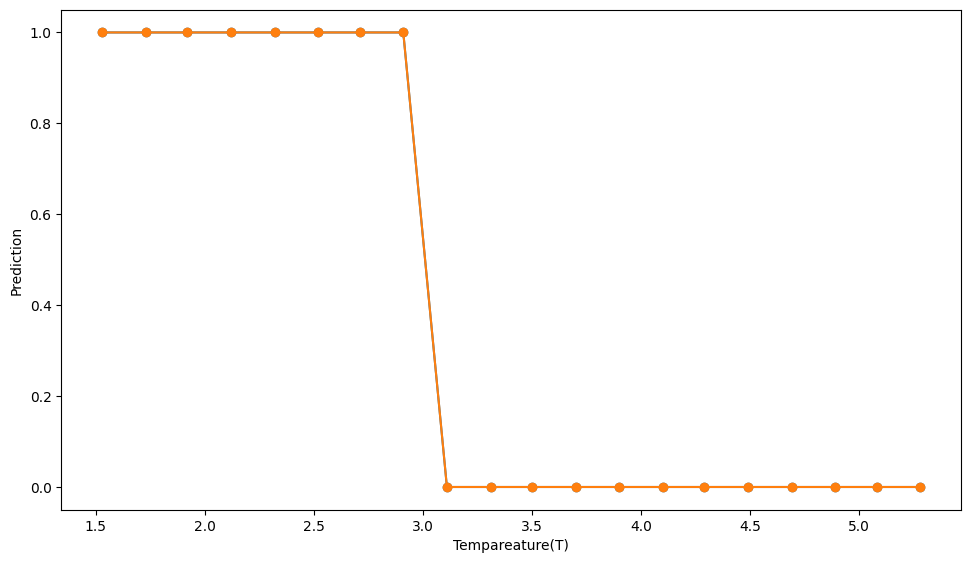

In [104]:
model.train(False)
test_accuracy = Accuracy(task="binary", num_classes=2)
tplot  = np.array([])
yplot  = np.zeros(len(T))
ytrue  = np.zeros(len(T))
ycount = np.zeros(len(T))
ypred  = np.array([])
yact   = np.array([])
for x, y, t in train_loader:
    with torch.no_grad():
        y_hat = model(x)
        ypred = np.append(ypred,y_hat)
        yact = np.append(yact,y)
        #tplot = np.append(tplot,t)
        for pT,py_hat,py in zip(t.detach().numpy(),y_hat.detach().numpy(),y.detach().numpy()):
            pT = int(pT)
            yplot[pT]  += py_hat[0]
            ytrue[pT]  += py
            ycount[pT] += 1
            
target = torch.tensor(ypred)
preds  = torch.tensor(yact)
print("Accuracy:",test_accuracy(target,preds))
yplot/=ycount
ytrue/=ycount
f = plt.figure(figsize=(9, 5));
f.add_axes([0,0,1,1])#matplotlib.pyplot.figure()
plt.plot(T,yplot, marker='o')
plt.plot(T,ytrue, marker='o')
plt.ylabel('Prediction')
plt.xlabel('Tempareature(T)')
plt.show()
    

In [ ]:
model.train(False)
test_accuracy = Accuracy(task="binary", num_classes=2)
for x, y, t in test_loader:
    with torch.no_grad():
            #Run inference on test dataset    
            #Insert code here

#compute accuracy
#plot Prediction vs tempature for truth and pred
#Do you get good validation? 

Ok, so once our validation is looking good, we want to show are neural network has actually learned something non-trivial for that we want to make a different Magnetic fild configuration with a different, but similar Hamiltonian, and see if we can us our neural network to predict the temuprature change. 

As a consequence, write a function for the Hamiltonian of the Triangular Ising model. We can define the triangular Ising model as a trigualr array as oppose to a square array like in the picture below fore [here](https://link.springer.com/article/10.1134/S1063776122050016)
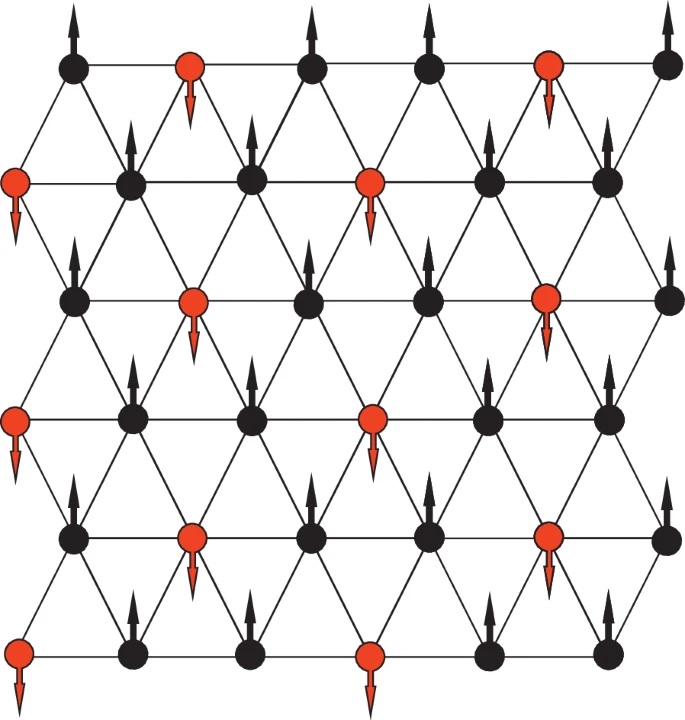

The Hamiltonian is again the Ising Hamiltonian except now we sum over all 6 elements $i,j$ connected to a point. 
$$
H = -\frac{1}{2}\sum_{i,j\in{adjacent to i}} \sigma_{i}\sigma_{j} - h \sum_{i} \sigma_{i}
$$

Just focusing on the first term, write a Hamiltonian that will act on an N$\times$N array following a pattern above  to create the triangular array. We can again use a video game Geometry to make this easier. Connect one end to the other. 


In [ ]:
#Now lets define the trignular ising 
def hamiltonian(iArr,N):
    #Compute the hamiltonian (note if you use this function you don't need to redeclare the above class)
    energy = 0
    for i in range(N):
        for j in range(N):
     
    return energy

def flip(i,j,iArr,beta):
    #finally run the Markov Chain process that computes delta energy, and based on the Markov deicison flips the spins. 

#Run some checks? 
#test.simulate()
#E[temp],M[temp],C[temp],X[temp]=test.lastAvg()

In [99]:
#Now lets define the trignular ising 
def hamiltonian(iArr,N):
    #Not optimized
    energy = 0
    for i in range(N):
        for j in range(N):
            spin   = iArr[i,j]
            shift  = (j-1) % 2 
            energy += -0.5*spin*(iArr[(i-1)%N, j ] +  iArr[(i+1)%N,j])
            energy += -0.5*spin*(iArr[(i-1+shift)%N, (j+1) % N ] + iArr[(i+shift)%N, (j+1) % N])
            energy += -0.5*spin*(iArr[(i-1+shift)%N, (j-1) % N ] + iArr[(i+shift)%N, (j-1) % N])
    return energy

def flip(i,j,iArr,TM1):
    spin   = iArr[i,j]
    shift  = (j-1) % 2 
    energy = 2*spin*(iArr[(i-1)%N, j ] +  iArr[(i+1)%N,j] + iArr[(i-1+shift)%N, (j+1) % N ] + iArr[(i+shift)%N, (j+1) % N]  + iArr[(i-1+shift)%N, (j-1) % N ] + iArr[(i+shift)%N, (j-1) % N])
    scanrnd = np.random.uniform(size=(energy.shape))
    expval  = np.exp(-1*(energy>0)*energy*TM1)
    iArr[i,j]  *= np.where(scanrnd < expval, -1, 1)


#test = Ising(64,3.0)
#test.simulate()

T       = np.linspace(1.53, 5.28, nt); 
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
for temp in tqdm (range (nt), desc="Loading..."):
    test = Ising(64,T[temp])
    test.simulate()
    E[temp],M[temp],C[temp],X[temp]=test.lastAvg()

Loading...:   0%|                                                                                                                                                                                                                      | 0/20 [00:00<?, ?it/s]/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_67450/2558316572.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 4096 + 1) instead
  ir = np.random.random_integers(N*N,size=(N*N))-1
Loading...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.75it/s]


Now, we can just us all of our prevoius code to run some simulations and save neural network output.

In [122]:
T       = np.round(np.linspace(1.53, 5.28, nt),2); 
print(T,nt)
T1      = np.round(np.linspace(5.28, 6.86, 9),2);
print(T1)
T2      = np.round(np.linspace(1.53, 6.86, 28),2);
T2[25]=6.46
print(T2)
a
for temp in tqdm (range (9), desc="Loading..."):
    filename='tridata_'+str(T1[temp])+'.h5'
    try:
        os.remove(filename)
    except OSError:
        pass
    test = Ising(32,T1[temp])
    test.nsim=500
    test.simulate_save('tri')

[1.53 1.73 1.92 2.12 2.32 2.52 2.71 2.91 3.11 3.31 3.5  3.7  3.9  4.1
 4.29 4.49 4.69 4.89 5.08 5.28] 20
[5.28 5.48 5.68 5.87 6.07 6.27 6.46 6.66 6.86]
[1.53 1.73 1.92 2.12 2.32 2.52 2.71 2.91 3.11 3.31 3.5  3.7  3.9  4.1
 4.29 4.49 4.69 4.89 5.08 5.28 5.48 5.68 5.87 6.07 6.27 6.46 6.66 6.86]


NameError: name 'a' is not defined

Finally, run the neural network on a dataset for triangular Ising models. Show that you can predict the correct tempearture, what is it? 

In [101]:
#Now lets test it on something different
def load():
    #following above, read teh data and output a dataset
    return data_tri_train, data_tri_test

data_tri_train, data_tri_test = load()
batch=1000
test_tri_loader = DataLoader(data_tri_test, batch_size=batch,shuffle=True)

#again following above, plot the temp applying your prevoiusly trained NN to the triagle boltzman
model.train(False)
for x, y, t in test_tri_loader:
    with torch.no_grad():

#What is accuracy?     
#plot Score vs Temp where is the phase transition, is it consistent with truth see arxiv paper

SyntaxError: incomplete input (1256617878.py, line 15)

Loading...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:01<00:00, 19.79it/s]


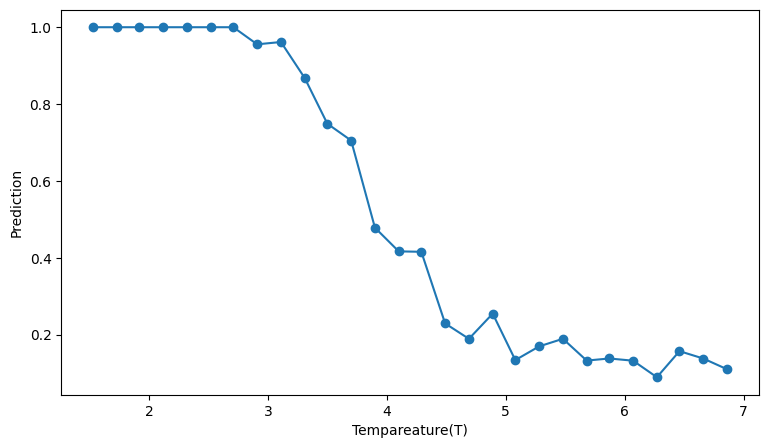

In [123]:
#Now lets test it on something different
def load():
    nones = 0
    all_tri_data  = None
    all_tri_temps = None
    for temp in tqdm (range (nt+8), desc="Loading..."):
        f = h5py.File('tridata_'+str(T2[temp])+'.h5', 'r')
        if temp == 0:
            all_tri_data  = f['data']
            all_tri_temps = np.ones(all_tri_data.shape[0])*temp
        else:
            all_tri_data  = np.append(all_tri_data, f['data'],axis=0)
            all_tri_temps = np.append(all_tri_temps,np.ones(f['data'].shape[0])*temp)
    if T2[temp] < 2.25:
        nones = all_data.shape[0]
        
    
    all_tri_data  = np.reshape(all_tri_data,(all_tri_data.shape[0],all_tri_data.shape[1]*all_tri_data.shape[2]))
    all_tri_labels=np.append(np.ones(nones),np.zeros(all_tri_data.shape[0]-nones)).astype("float32")
    all_tri_dataset = DataSet(samples=all_tri_data.astype("float32"),labels=all_tri_labels,temps=all_tri_temps)
    ntotal = all_tri_data.shape[0]
    data_tri_train, data_tri_test = random_split(all_tri_dataset, [int(0.8*ntotal),ntotal-int(0.8*ntotal)])
    return data_tri_train, data_tri_test

data_tri_train, data_tri_test = load()
batch=1000
test_tri_loader = DataLoader(data_tri_test, batch_size=batch,shuffle=True)

model.train(False)
tplot  = np.array([])
yplot  = np.zeros(len(T2))
ytrue  = np.zeros(len(T2))
ycount = np.zeros(len(T2))
for x, y, t in test_tri_loader:
    with torch.no_grad():
        y_hat = model(x)
        for pT,py_hat,py in zip(t.detach().numpy(),y_hat.detach().numpy(),y.detach().numpy()):
            pT = int(pT)
            yplot[pT]  += py_hat[0]
            ytrue[pT]  += py
            ycount[pT] += 1
yplot/=ycount
ytrue/=ycount

f = plt.figure(figsize=(9, 5));
plt.plot(T2,yplot, marker='o')
plt.ylabel('Prediction')
plt.xlabel('Tempareature(T)')
plt.show()
    

Ok, so we should now have a result, and you can see hwo this behaves. From this we can ask a few questions:  
 * Do you see a phase transition?  
 * Does this agree with the paper? 
 * What can you do to make this more accurate?
 
Now there are many follow ups to this study. However, I would like to highlight that he big gains that come from thsi are not the network itself, its more that the NN has been able to do a visual inspection of a material and made conclusions that are not necessarily obvious. Using this can lead to better analysis of data. Moreover, we can ask ourselves the question if we can accurately predict properties of materials can we use this to advance our understanding. 

In the following section, we will explore how we can use Machine learned distributions to rapdily accelerate simulation allow us to perform advanced lattice measurements leading to critical material properties. 

# Part 2 Lattice QCD

Some text about what we will do here

## Intro to LQCD

### Helper functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

Before we go to interesting things let's define some usefull helper functions. 

In [ ]:
def torch_mod(x):
    return torch.remainder(x, 2*np.pi)
def torch_wrap(x):
    return torch_mod(x+np.pi) - np.pi
def grab(var):
    return var.detach().cpu().numpy()

def print_metrics(history, avg_last_N_epochs):
  print(f'== Era {era} | Epoch {epoch} metrics ==')
  for key, val in history.items():
      avgd = np.mean(val[-avg_last_N_epochs:])
      print(f'\t{key} {avgd:g}')
def moving_average(x, window=10):
    if len(x) < window:
       return np.mean(x, keepdims=True)
    else:
       return np.convolve(x, np.ones(window), 'valid') / window


We also define some functions for making nice plots. Fill free to skip this part.

In [ ]:
def init_live_plot(dpi=125, figsize=(8,4)):
    fig, ax_ess = plt.subplots(1,1, dpi=dpi, figsize=figsize)
    plt.xlim(0, N_era*N_epoch)
    plt.ylim(0, 1)
    ess_line = plt.plot([0],[0], alpha=0.5) # dummy
    plt.grid(False)
    plt.ylabel('ESS')
    ax_loss = ax_ess.twinx()
    loss_line = plt.plot([0],[0], alpha=0.5, c='orange') # dummy
    plt.grid(False)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    display_id = display(fig, display_id=True)
    return dict(
        fig=fig, ax_ess=ax_ess, ax_loss=ax_loss,
        ess_line=ess_line, loss_line=loss_line,
        display_id=display_id
    )
def update_plots(history, fig, ax_ess, ax_loss, ess_line, loss_line, display_id):
    Y = np.array(history['ess'])
    Y = moving_average(Y, window=15)
    ess_line[0].set_ydata(Y)
    ess_line[0].set_xdata(np.arange(len(Y)))
    Y = history['loss']
    Y = moving_average(Y, window=15)
    loss_line[0].set_ydata(np.array(Y))
    loss_line[0].set_xdata(np.arange(len(Y)))
    ax_loss.relim()
    ax_loss.autoscale_view()
    fig.canvas.draw()
    display_id.update(fig) # need to force colab to update plot

PyTorch is flexible framefork for machine learning and allows building complicated Neural Networs. However, in this part of the project we will use only two-dimentionsl Convolutiona Neural Networks with different configurations. Below we define a fabric which builds CNN with specified parameters.

In [ ]:
def make_conv_net(*, hidden_sizes, kernel_size, in_channels, out_channels):
    sizes = [in_channels] + hidden_sizes + [out_channels]
    #assert packaging.version.parse(torch.__version__) >= packaging.version.parse('1.5.0')
    assert kernel_size % 2 == 1, 'kernel size must be odd for PyTorch >= 1.5.0'
    padding_size = (kernel_size // 2)
    net = []
    for i in range(len(sizes) - 1):
        net.append(torch.nn.Conv2d(
            sizes[i], sizes[i+1], kernel_size, padding=padding_size,
            stride=1, padding_mode='circular'))
        if i != len(sizes) - 2:
            net.append(torch.nn.LeakyReLU())
        else:
            net.append(torch.nn.Tanh())
    return torch.nn.Sequential(*net)

For example we can build CNN with 2 hidden channels with sizes 8, 8, kernel size 3 and 2 input channels and 4 output channels.

In [ ]:
m = make_conv_net(
    hidden_sizes=[8,8],
    kernel_size=3,
    in_channels=2,
    out_channels=4
)
print(m)

Sequential(
  (0): Conv2d(2, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Conv2d(8, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
  (5): Tanh()
)


### Box-Muller transform

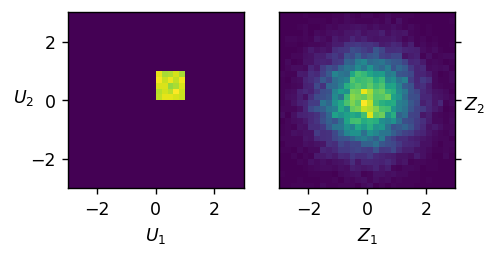

In [ ]:
batch_size = 2**14
u = np.random.random(size=(batch_size, 2))
z = np.sqrt(-2*np.log(u[:,0]))[:,np.newaxis] * np.stack(
      (np.cos(2*np.pi*u[:,1]), np.sin(2*np.pi*u[:,1])), axis=-1)
fig, ax = plt.subplots(1,2, dpi=125, figsize=(4,2))
for a in ax:
    a.set_xticks([-2, 0, 2])
    a.set_yticks([-2, 0, 2])
    a.set_aspect('equal')
ax[0].hist2d(u[:,0], u[:,1], bins=30, range=[[-3.0,3.0], [-3.0,3.0]])
ax[0].set_xlabel(r"$U_1$")
ax[0].set_ylabel(r"$U_2$", rotation=0, y=.46)
ax[1].hist2d(z[:,0], z[:,1], bins=30, range=[[-3.0,3.0], [-3.0,3.0]])
ax[1].set_yticklabels([])
ax[1].set_xlabel(r"$Z_1$")
ax[1].set_ylabel(r"$Z_2$", rotation=0, y=.53)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
plt.show()

## Scalar field theory on the lattice


We'll use the Euclidean lattice action,
\begin{equation}
\begin{split}
S^E_{\text{latt}}(\phi) &= \sum_{\vec{n}} \phi(\vec{n}) \left[ \sum_{\mu \in \{1,2\}} 2\phi(\vec{n}) - \phi(\vec{n}+\hat{\mu}) - \phi(\vec{n}-\hat{\mu}) \right] + m^2 \phi(\vec{n})^2 + \lambda \phi(\vec{n})^4
\end{split}
\end{equation}
where $\phi(\vec{n})$ is a real-valued scalar defined on the sites of an $L_x \times L_y$ lattice, and $\vec{n} = (n_x, n_y)$, with integer $n_x, n_y$. We use periodic boundary conditions in all directions, i.e. $\phi(L_x, y) \equiv \phi(0, y)$, etc.

The class below implements this action. Each instance of the class is a function $S$ with fixed $m^2$, $\lambda$.

In [ ]:
class ScalarPhi4Action:
    def __init__(self, M2, lam):
        self.M2 = M2
        self.lam = lam
    def __call__(self, phi):
        action_density = torch.zeros_like(phi)
        
        # potential term
        action_density += self.M2*phi**2
        action_density += self.lam*phi**4
        
        # kinetic term (discrete Laplacian)
        Nd = len(phi.shape)-1
        dims = range(1,Nd+1)
        for mu in dims:
            action_density += 2*phi**2
            action_density -= phi*torch.roll(phi, -1, mu)
            action_density -= phi*torch.roll(phi, 1, mu)
        return torch.sum(action_density, dim=tuple(dims))

The theory has a symmetric phase and a broken symmetry phase. For simplicity, we restrict focus to the **symmetric phase**. The cell below instantiates an action for a set of parameters in this phase.

In [ ]:
M2 = -4.0
lam = 8.0
phi4_action = ScalarPhi4Action(M2=M2, lam=lam)

TODO: add text about Ising and Gaussian limits

## Normalizing flows

The lattice action defines the _target distribution_ $p$ over configurations $\phi$,
\begin{equation}
p(\phi) = \frac{1}{Z} e^{-S(\phi)}, \quad
Z \equiv \int \prod_{\vec{n}} d\phi(\vec{n}) ~ e^{-S(\phi)},
\end{equation}
where $\prod_{\vec{n}}$ runs over all lattice sites $\vec{n}$.
Typically one uses algorithms like HMC to generate configurations from this distribution.

Instead, a powerful method to generate samples from complicated distributions is to: 
1. draw samples $z$ from a simple distribution $r(z)$ (the _prior distribution_), then
2. apply a deterministic change-of-variables $f$ (a _normalizing flow_) to get transformed samples $\phi = f(z)$.

The prior $r$ and flow $f$ together define a _normalizing flow model_. Note that in this example, $z$ and $\phi$ are both scalar fields.

The transformed samples $\phi$ are distributed according to the _model distribution_, $q$, whose density is given by the change-of-variables (or "conservation of probability") formula,

\begin{equation}
    q(\phi) = r(z) [J(z)]^{-1} = r(z) \left|\det_{kl} \frac{\partial f_k(z)}{ \partial z_l} \right|^{-1} .
\end{equation}


$f$ must be **invertible** and **differentiable** for $q(\phi)$ to be well-defined. For the model to be useful, $f$ must be expressive and the Jacobian determinant factor $J(z)$ must be efficient to calculate. As you'll see below, in some cases it is easy to compute $J$ even when the whole Jacobian matrix is intractable. 

<!-- Below we construct _coupling layers_ where only the diagonal elements are needed, because the Jacobian matrix is known to be triangular. -->



### **Prior distribution**

We choose the prior distribution to be I.I.D. Gaussians at each lattice site, with unit width and mean zero. This is easy to sample from, and intuitively gives a "blank slate" for $f$ to build correlations into.

The cell below defines a class for this prior (which is really just a wrapper for PyTorch's normal distribution sampler), and shows how to instantiate it for lattice volume $L^2$.

In [ ]:
class SimpleNormal:
    def __init__(self, loc, var):
        self.dist = torch.distributions.normal.Normal(
            torch.flatten(loc), torch.flatten(var))
        self.shape = loc.shape
    def log_prob(self, x):
        logp = self.dist.log_prob(x.reshape(x.shape[0], -1))
        return torch.sum(logp, dim=1)
    def sample_n(self, batch_size):
        x = self.dist.sample((batch_size,))
        return x.reshape(batch_size, *self.shape)
    
L = 16
lattice_shape = (L,L)
prior = SimpleNormal(torch.zeros(lattice_shape), torch.ones(lattice_shape))

### Coupling layers

Expressive functions can be built through composition of simpler ones, i.e.
\begin{equation}
    f = g_n \circ g_{n-1} \circ \ldots \circ g_1 \Leftrightarrow f(z) = g_n(g_{n-1}(\ldots g_1(z)))
\end{equation}
When each simpler function is invertible and differentiable, the composed function is as well. 

**Coupling layers** are one approach to defining the $g_i$ in the composed function. For input variables $\phi$, these functions are defined to update only the "active" subset $\phi_1$ conditioned on the complimentary "frozen" subset $\phi_2$. 


A coupling layer $g(\phi_1, \phi_2) = (\phi_1', \phi_2')$ based on an *affine transformation* looks like

\begin{equation}
\begin{split}
  \phi_1 '  &= e^{s(\phi_2)} \phi_1 + t(\phi_2) \\
  \phi_2 '  &= \phi_2
\end{split}
\end{equation}

with inverse 

\begin{equation}\begin{aligned}
  \phi_1 &= e^{-s(\phi_2')} \left( \phi_1' - t(\phi_2') \right)
  \\
  \phi_2 &= \phi_2'
\end{aligned}\end{equation}

**Note:** this equation is thinking of $\phi_1$, $s$, $t$ as vectors over the active variables/sites, and $\phi_2$ as a vector over the frozen variables/sites. The multiplication/addition is thus elementwise/per-site.

The _parameters defining the transform_, $s(\phi_2)$ and $t(\phi_2)$, can be complicated, non-invertible functions of the frozen variables $\phi_2$; we'll use neural nets for these.


The partioning of variables ensures that the Jacobian is triangular,

\begin{equation}
\frac{\partial g(\phi_1, \phi_2)}{\partial (\phi_1, \phi_2)} =
\left( \begin{matrix}
    \frac{\partial \phi_1'}{\partial \phi_1} & \frac{\partial \phi_1'}{\partial \phi_2} \\
    0 & 1
\end{matrix} \right).
\end{equation}

For an affine transformation, this takes the form

\begin{equation}
\frac{\partial g(\phi_1, \phi_2)}{\partial (\phi_1, \phi_2)} =
\left( \begin{array}{ccc|ccc}
    e^{[s(\phi_2)]_1} & & & \cdot & \cdot & \cdot \\
    & e^{[s(\phi_2)]_2} & & \cdot & \cdot & \cdot \\
    & & \ddots & \cdot & \cdot & \cdot \\
    \hline
    & & & 1 & & \\
    & 0 & & & 1 & \\
    & & & & & \ddots
\end{array} \right)
\end{equation}

so that the Jacobian determinant factor is just

\begin{equation}
J(\phi) = \left|\det_{kl} \frac{\partial [g(\phi_1, \phi_2)]_k}{\partial (\phi_1, \phi_2)} \right| = \prod_{k} e^{[s(\phi_2)]_k}
\end{equation}

which is tractably computable.

In this example, we define the active ($\phi_1$) and frozen ($\phi_2$) subsets using checkerboard masks, which allow sites to influence the transformation of their direct neighbors and build local correlations.
To ensure all variables are updated, we compose coupling layers that alternatingly update odd sites and even sites.


[**Aside:** In all the code below, for the mask $m(\vec{n}) \in \{0, 1\}$, if $m(\vec{n}) = 1$ then $\phi(\vec{n})$ is frozen and vice versa. This is just a convention.]

In [ ]:
def make_checker_mask(shape, parity):
    checker = torch.ones(shape, dtype=torch.uint8) - parity
    checker[::2, ::2] = parity
    checker[1::2, 1::2] = parity
    return checker.to(torch_device)

The code below defines an affine coupling layer.

[**Aside:** class field `net` is an instance of the CNN like the ones defined above. It has one input channel (the frozen sites of the scalar field, with zeros for the active sites), and two output channels (one for $s$, one for $t$). The net produces outputs $s$ and $t$ with nonzero elements for the frozen sites, which are simply ignored using masks.]

In [ ]:
class AffineCoupling(torch.nn.Module):
    def __init__(self, net, *, mask_shape, mask_parity):
        super().__init__()
        self.mask = make_checker_mask(mask_shape, mask_parity)
        self.net = net

    def forward(self, x):
        x_frozen = self.mask * x      
        x_active = (1 - self.mask) * x
        net_out = self.net(x_frozen.unsqueeze(1))
        s, t = net_out[:,0], net_out[:,1]
        fx = (1 - self.mask) * t + x_active * torch.exp(s) + x_frozen
        axes = range(1,len(s.size()))
        logJ = torch.sum((1 - self.mask) * s, dim=tuple(axes))
        return fx, logJ

    def reverse(self, fx):
        fx_frozen = self.mask * fx
        fx_active = (1 - self.mask) * fx  
        net_out = self.net(fx_frozen.unsqueeze(1))
        s, t = net_out[:,0], net_out[:,1]
        x = (fx_active - (1 - self.mask) * t) * torch.exp(-s) + fx_frozen
        axes = range(1,len(s.size()))
        logJ = torch.sum((1 - self.mask)*(-s), dim=tuple(axes))
        return x, logJ

#### **Exercise #1 (Invertability test)**

Normalizing flows defined using a flow transformation which must be diffeomorhhism, i.e. be invertable and differentiable. Breaking this condition results in ill-defined posterior density and breaking ergodicity. Computations of physical observales using samples generated with such a flow will have uncontrollable bias. As we know from math our flow transformation must be invertable but it is usefull to verify it numerically as we could make an error in our code.

To insure that flow transformation is diffeorophism we need to check that1) flow transformation is invertable as well 2) invertability of jacobian of forward and inverse transfromation. To do so,

1) generate random fields
$$z_0 ← \text{random()}$$
2) apply flow transformation, and compute jacobian
$$x = f(z_0), \quad \text{logJ}=|det \frac{\partial z_0}{\partial x}|$$
3) apply reverse tranfromation
$$z_1 = f^{-1}(x), \quad \text{logJ1}= \text{logJ}=|det \frac{\partial z_1}{\partial x}|$$
4) and verify that 
$$z_1 == z_0, \quad \text{logJ} == -\text{logJ1} $$

In implementation of a coupling class we defined action of a `f()` and `f^{-1}` as `forward()` and `reverse()` methods. You can use them.

In [ ]:
# EXERCISE
L = 4

# makes the coupling layer
net = make_conv_net(in_channels=1, out_channels=2, hidden_sizes=[16], kernel_size=3)
layer = AffineCoupling(net=net, mask_shape=(L,L), mask_parity=1).to(torch_device)

# makes a toy field of the appropriate size/shape
z0 = torch.arange(L**2).reshape(1,L,L).type(torch.FloatTensor).to(torch_device)

x, logJ0 = # INSERT CODE HERE
z1, logJ1 = # INSERT CODE HERE

# TODO: compare using torch.allclose
#ADD Check Code here

SyntaxError: ignored

In [ ]:
# ANSWER
torch_device='cpu'
L = 4

# makes the coupling layer
net = make_conv_net(in_channels=1, out_channels=2, hidden_sizes=[16], kernel_size=3)
layer = AffineCoupling(net=net, mask_shape=(L,L), mask_parity=1).to(torch_device)

# makes a toy field of the appropriate size/shape
z0 = torch.arange(L**2).reshape(1,L,L).type(torch.FloatTensor).to(torch_device)

x, logJ0 = layer(z0)
z1, logJ1 = layer.reverse(x)

assert torch.allclose(z0, z1)
assert torch.allclose(logJ0, -logJ1)

#### **Exercise #2 (logJ test): TODO**

Using torch.gradcheck verify that logJ computed correctly.

### **Composition**

The helper function below just builds a sequence of coupling layers with alternating-parity checkerboards, providing a separate neural net for each with the same hyperparameters.

In [ ]:
def make_phi4_layers(*, n_layers, lattice_shape, hidden_sizes, kernel_size):
    layers = []
    for i in range(n_layers):
        parity = i % 2
        net = make_conv_net(
            in_channels=1, out_channels=2, hidden_sizes=hidden_sizes,
            kernel_size=kernel_size)
        coupling = AffineCoupling(net, mask_shape=lattice_shape, mask_parity=parity)
        layers.append(coupling)
    return torch.nn.ModuleList(layers)

The Jacobian factors $J_i$ from each coupling layer simply multiply together to define the Jacobian factor of the composed function, so that the final density is
\begin{equation}
\begin{split}
    q(x) &= r(z) \left| \det \frac{\partial f(z)}{\partial z} \right|^{-1} = r(z) \prod_{i} J_i^{-1}.
\end{split}
\end{equation}
In practice, we'll add together log Jacobians instead.

In [ ]:
def apply_flow_to_prior(prior, coupling_layers, *, batch_size):
    x = prior.sample_n(batch_size)
    logq = prior.log_prob(x)
    for layer in coupling_layers:
        x, logJ = layer.forward(x)
        logq = logq - logJ
    return x, logq

### Model

We now have everything we need to make a flow model. The cell below instantiates one.

In [ ]:
L = 16
lattice_shape = (L,L)
prior = SimpleNormal(torch.zeros(lattice_shape), torch.ones(lattice_shape))

n_layers = 16
hidden_sizes = [8,8]
kernel_size = 3
layers = make_phi4_layers(
    lattice_shape=lattice_shape, n_layers=n_layers, 
    hidden_sizes=hidden_sizes, kernel_size=kernel_size)

model = {'layers': layers, 'prior': prior}

Draw 16 configurations from the untrained flow model. What do they look like?

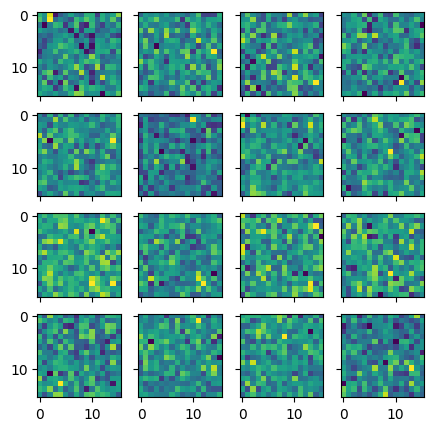

In [ ]:
x, logq = apply_flow_to_prior(model['prior'], model['layers'], batch_size=16)

fig,axes = plt.subplots(4,4, figsize=(5,5), sharex=True, sharey=True)
for ax, x0 in zip(axes.ravel(),x):
    ax.imshow(grab(x0).squeeze().T, aspect='equal')
    ax.grid(False)

How can we tell if this is a good model for the target action? This is a hard question in general, but effective sample size (ESS) per configuration could be good metric for that which live in the range $[0,1]$ (lager is better). 

In [ ]:
def compute_ess(logp, logq):
    logw = logp - logq
    log_ess = 2*torch.logsumexp(logw, dim=0) - torch.logsumexp(2*logw, dim=0)
    ess_per_cfg = torch.exp(log_ess) / len(logw)
    return ess_per_cfg

### **Train the model**

For convenience, the cell below instantiates the model and everything we need to train it. We'll work with very small lattices with $L=4$ so training goes quickly.

In [ ]:
# Lattice Theory
L = 4
lattice_shape = (L,L)
M2 = -4.0
lam = 8.0
phi4_action = ScalarPhi4Action(M2=M2, lam=lam)

# Model
prior = SimpleNormal(torch.zeros(lattice_shape), torch.ones(lattice_shape))

n_layers = 16
hidden_sizes = [8,8]
kernel_size = 3
layers = make_phi4_layers(lattice_shape=lattice_shape, n_layers=n_layers, 
    hidden_sizes=hidden_sizes, kernel_size=kernel_size)
model = {'layers': layers, 'prior': prior}

# Training
base_lr = .001
optimizer = torch.optim.Adam(model['layers'].parameters(), lr=base_lr)

We need to optimize the coupling layers to match the model distribution $q(\phi)$ to the target one $p(\phi)$. To do this, we minimize a quantity known as the Kullback-Leibler (KL) divergence, which measures how close two distributions are. Training data drawn from $p$ can be scarce in simulations of lattice field theories, so we make use of the "reverse" KL divergence,
estimated using $N$ samples drawn from the model distribution ($\phi_i \sim q$) as
\begin{equation}
\widehat{D}_{KL}(q || p) = \frac{1}{N} \sum_{i=1}^N \left[ \log{q}(\phi_i) - \log{p}(\phi_i) \right] \quad \left( \phi_i \sim q \right).
\end{equation}

We use a "reverse KL self-training" protocol that consists of
  1. Drawing samples $\phi_i$ and density estimates $\log q(\phi_i)$ from the model
  2. Computing $\log p(\phi_i) \propto -S(\phi_i)$ on each sample
  3. Using $\log q$ and $\log p$ to compute the reverse KL divergence over the samples
  3. Using standard stochastic gradient descent methods (i.e. Adam) to iteratively update neural network weights
  
  
#### **Exercise #3 (training with Dkl)**
 These basic steps should look familiar from previous tutorial. Fill out the function below.

In [ ]:
def train_step(model, action, optimizer, metrics):
    layers, prior = model['layers'], model['prior']

    # 1. generate sample and compute jacobian -> x, logJ
    # 2. compute log action -> logp
    # 3. compute Dkl -> loss
    x, logq = # INSERT CODE HERE
    logp = # INSERT CODE HERE
    loss = # INSERT CODE HERE

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # log some metrics as we go
    metrics['loss'].append(grab(loss))
    metrics['logp'].append(grab(logp))
    metrics['logq'].append(grab(logq))
    metrics['ess'].append(grab( compute_ess(logp, logq) ))

SyntaxError: ignored

In [ ]:
# Answer
def train_step(model, action, optimizer, metrics):
    layers, prior = model['layers'], model['prior']

    x, logq = apply_flow_to_prior(prior, layers, batch_size=batch_size)
    logp = -action(x)
    loss = (logq - logp).mean()
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    metrics['loss'].append(grab(loss))
    metrics['logp'].append(grab(logp))
    metrics['logq'].append(grab(logq))
    metrics['ess'].append(grab( compute_ess(logp, logq) ))

At this moment we are ready to set hyperparameters for training 

In [ ]:
N_era = 1
N_epoch = 200
batch_size = 256
print_freq = 50
plot_freq = 1

history = {
    'loss' : [],
    'logp' : [],
    'logq' : [],
    'ess' : []
}

and run training

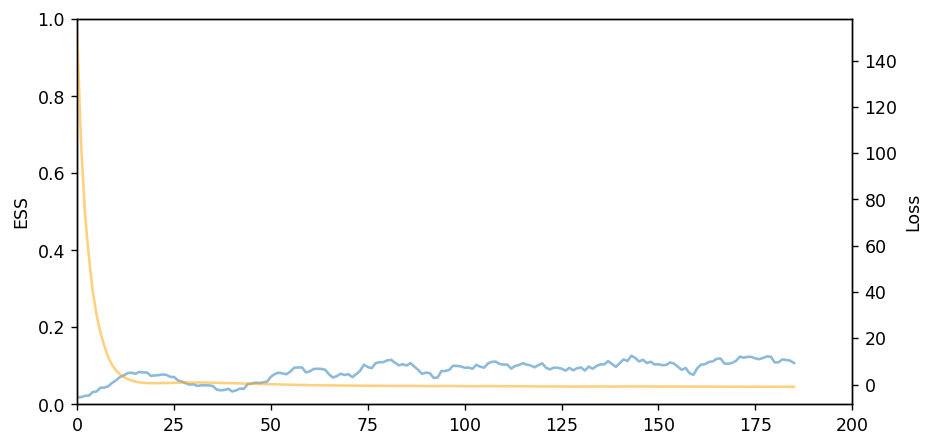

== Era 0 | Epoch 0 metrics ==
	loss 706.234
	logp -727.686
	logq -21.4518
	ess 0.00390649
== Era 0 | Epoch 50 metrics ==
	loss 31.7039
	logp -37.1536
	logq -5.44974
	ess 0.0479049
== Era 0 | Epoch 100 metrics ==
	loss -0.315899
	logp -2.96117
	logq -3.27707
	ess 0.0866309
== Era 0 | Epoch 150 metrics ==
	loss -0.765071
	logp -3.22148
	logq -3.98655
	ess 0.0990112


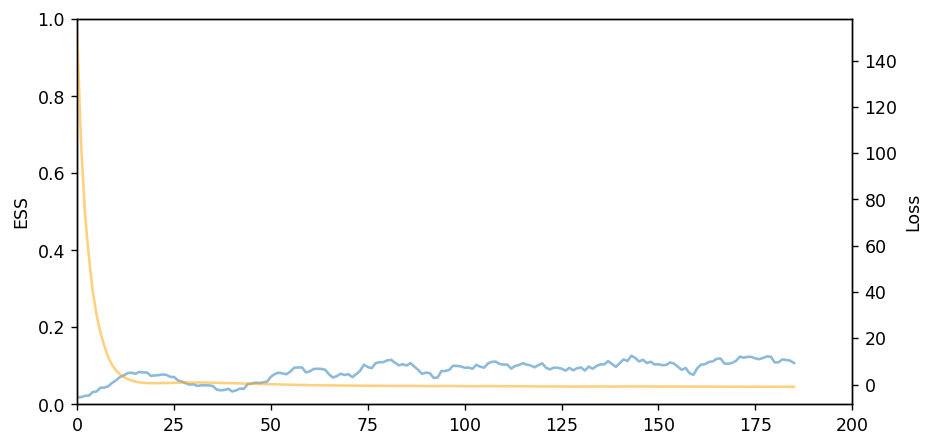

In [ ]:

[plt.close(plt.figure(fignum)) for fignum in plt.get_fignums()] # close all existing figures
live_plot = init_live_plot()

for era in range(N_era):
    for epoch in range(N_epoch):
        train_step(model, phi4_action, optimizer, history)

        if epoch % print_freq == 0:
            print_metrics(history, avg_last_N_epochs=print_freq)

        if epoch % plot_freq == 0:
            update_plots(history, **live_plot)

The cell below draws a batch of configurations from the sample, computes $S(\phi)$ and $S_{\text{eff}} \equiv - \log q(\phi)$ on each one, then makes a 2d histogram comparing these quantities.

**Discuss:** What would this look like for a perfect model? How does your model compare?

slope 1 linear regression S = S_eff + -1.0289


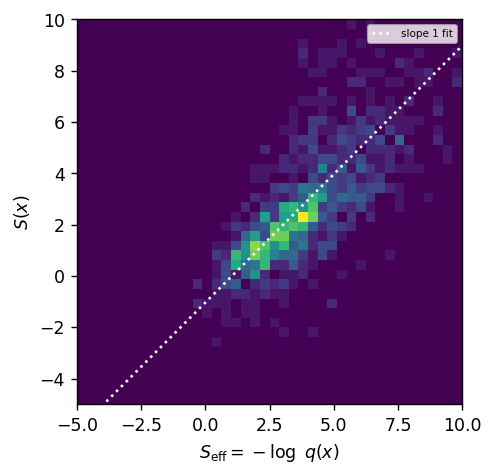

In [ ]:
with torch.no_grad():
  phi, logq = apply_flow_to_prior(model['prior'], model['layers'], batch_size=1024)
S_eff = -grab(logq)
S = grab(phi4_action(phi))
fit_b = np.mean(S) - np.mean(S_eff)
print(f'slope 1 linear regression S = S_eff + {fit_b:.4f}')
fig, ax = plt.subplots(1,1, dpi=125, figsize=(4,4))
ax.hist2d(S_eff, S, bins=40, range=[[-5, 10], [-5, 10]])
ax.set_xlabel(r'$S_{\mathrm{eff}} = -\log~q(x)$')
ax.set_ylabel(r'$S(x)$')
ax.set_aspect('equal')
xs = np.linspace(-5, 10, num=4, endpoint=True)
ax.plot(xs, xs + fit_b, ':', color='w', label='slope 1 fit')
plt.legend(prop={'size': 6})
plt.show()

## Metropolis-Hastings algorithm


Metropolis-Hastings algorithm is a Markov chain Monte Carlo method for generating samples for any probability distribution and is often used when direct sampling is complicated or not possible. The idea is to start with some arbitrary configuration and construct a sequence of configurations. Under some conditions configurations in this sequence eventually follow target distribution. The particular algorithm is:

1) Generate some new candidate configuration $\phi'$ from configuration $\phi^{i-1}$ with some proposal probability  $T(\phi^{i-1}\rightarrow \phi')$.

2) Accept candidate configuration $ \phi'$ as a new configuration $\phi^i$ with acceptance probability.
\begin{equation}
p_{\mathrm{accept}}(\phi'|\phi^{i-1}) = \min \left(
    1,\;
    \frac{T(\phi' \rightarrow \phi^{i-1})}{T(\phi^{i-1} \rightarrow \phi')}
    \frac{p(\phi')}{p(\phi^{i-1})}
\right),
\end{equation}
where $p(\phi)$ is a target probability density. If the suggested configuration is not accepted, the unchanged configuration is considered again in a sequence $\phi^i = \phi^{i-1}$.

3) Repeat the steps to generate full ensembles.

It can be shown that samples generated with this algorithm are distributed with targeted probability density if $T(\phi^{i-1} \rightarrow \phi')$ is ergodic, i.e. there is the non-zero probability to generate all possible configurations $\phi'$.

### Metropolis algorithm for scalar field theory TODO

We can choose 


### Metropolis algorithm for normalizing flow
To produce **unbiased** estimates of observables, we can use model samples as proposals in  the Metropolis-Hastings (MH) algorithm. Normalizing flows along with generated sample $\phi$ provide probability density $q(\phi)$. We can use this density as a proposal probability in MH algorith. In this case formula for acceptance probability will take form
\begin{equation}
p_{\mathrm{accept}}(\phi'|\phi^{i-1}) = \min \left(
    1,\;
    \frac{q(\phi^{i-1})}{q(\phi')}
    \frac{p(\phi')}{p(\phi^{i-1})}
\right).
\end{equation}


The convenience function generates draws batches of samples from a flow model, and yields them (along with $\log p$ and $\log q$) one at a time. We use each sample as a proposal in MH.

In [ ]:
def serial_sample_generator(model, action, batch_size, N_samples):
    layers, prior = model['layers'], model['prior']
    layers.eval()
    x, logq, logp = None, None, None
    with torch.no_grad():
      for i in range(N_samples):
          batch_i = i % batch_size
          if batch_i == 0:
              # we're out of samples to propose, generate a new batch
              x, logq = apply_flow_to_prior(prior, layers, batch_size=batch_size)
              logp = -action(x)
          yield x[batch_i], logq[batch_i], logp[batch_i]

If you are not familiar with generators in Python this function creates an object which you can use to iterate on, e.g.

In [ ]:
l = [phi.mean() for phi, _, _ in serial_sample_generator(model, phi4_action, 4, 6)]
print("Filed values:", l)

Filed values: [tensor(0.0420), tensor(-0.1673), tensor(-0.0945), tensor(-0.2849), tensor(-0.0317), tensor(-0.2532)]


#### **Exercise #5: MH for flow samples** 
Build a MCMC ensemble from independent flow proposals. Use acceptance probability we defined above. It is usefull to store history of some metrics as well. We prepared a code for you sniplet below.

In [ ]:
def make_mcmc_ensemble(model, action, batch_size, N_samples):
    # fill this history dir with values in MCMC ensemble
    history = {
        'x' : [],
        'logq' : [],
        'logp' : [],
        'accepted' : []
    }

    return history

In [ ]:
#Answer
def make_mcmc_ensemble(model, action, batch_size, N_samples):
    history = {
        'x' : [],
        'logq' : [],
        'logp' : [],
        'accepted' : []
    }

    # build Markov chain
    sample_gen = serial_sample_generator(model, action, batch_size, N_samples)
    for new_x, new_logq, new_logp in sample_gen:
        if len(history['logp']) == 0:
            # always accept first proposal, Markov chain must start somewhere
            accepted = True
        else: 
            last_logp = history['logp'][-1]
            last_logq = history['logq'][-1]
            
            p_accept = torch.exp((new_logp - new_logq) - (last_logp - last_logq))
            p_accept = min(1, p_accept)
            
            draw = torch.rand(1) # ~ [0,1]
            if draw < p_accept:
                accepted = True
            else:
                accepted = False
                new_x = history['x'][-1]
                new_logp = last_logp
                new_logq = last_logq
        # Update Markov chain
        history['logp'].append(new_logp)
        history['logq'].append(new_logq)
        history['x'].append(new_x)
        history['accepted'].append(accepted)
    return history

Now we can calculate the Independence Metropolis acceptance rate, which is another metric of the quality of our model like the ESS.

In [ ]:
ensemble_size = 81920
phi4_ens = make_mcmc_ensemble(model, phi4_action, 64, ensemble_size)
print("Accept rate:", np.mean(phi4_ens['accepted']))

Accept rate: 0.25360107421875


It could be interesting to compare action distribution for model samples and MCMC-corrected unbiased one.

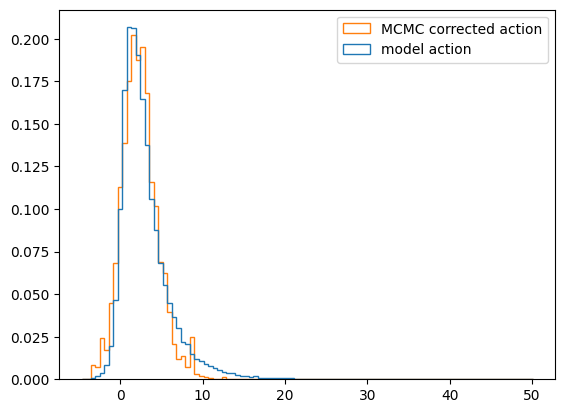

In [ ]:
with torch.no_grad():
  phi, _ = apply_flow_to_prior(model['prior'], model['layers'], batch_size=ensemble_size)
phi_unbiased = torch.stack(phi4_ens['x'])

S, S_unbiased = map(lambda x: phi4_action(x).cpu(), [phi, phi_unbiased])
plt.hist(torch.stack([S, S_unbiased]), label=['model action', 'MCMC corrected action'], bins=100, density=1, histtype='step');
plt.legend();

Note from Phil: I would really like this to lead to a physical observable that is interpretable. Even if its some measurement in phi4 theory, that is fine. However, I really think we weant to have some meaningful physics at teh end of this. 

## Free energy

The probability distribution used in lattice QCD has a complicated form and can not be sampled directly. MCMC algorithm is usually used. There are more powerful algorithms then MH discussed in a previous section which allow the generation of samples more efficiently. However, all these methods do not provide access to a probability density, namely, normalization $Z$  of probability density $p(\phi) = \frac{1}{Z} e^{-S(\phi)}$ is not known. In physics, $Z$ is called Partition Function and determines the thermodynamical properties of the system such as entropy, pressure, and equation of states. Free energy is defined as 
$$
F = \frac{1}{T} log Z,
$$
with $T$ absolute temperature is more often computed.

The study of QCD at non-zero temperature and density is a hot topic as at the early stage of the universe the phase of matter took the form of a hot phase of quark matter called the quark–gluon plasma. Thermodynamical properties and phase diagram of QCD is studied through computations of free energy.

TODO: add about classical methods for free energy computations


### Exercide (Estimator of logZ)

Write an estimator for $Z$. Start with a definition of $Z$ as a normalizer for target probability density and write it as estimator values over $q(\phi$).

#### ANSWER
$$
Z = \frac{1}{N} \sum_i \frac{e^{-s(\phi_i)}}{q(\phi_i)}
$$